In [119]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sb

% matplotlib inline

UsageError: Line magic function `%` not found.


In [4]:
# read in the json files
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

In [5]:
print(portfolio.shape)
portfolio.head()

(10, 6)


,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [6]:
import itertools
np.unique([*itertools.chain.from_iterable(portfolio.channels)])

array(['email', 'mobile', 'social', 'web'], dtype='<U6')

In [7]:
channels_arr = portfolio.loc[:, 'channels'].values
channels_arr

array([list(['email', 'mobile', 'social']),
       list(['web', 'email', 'mobile', 'social']),
       list(['web', 'email', 'mobile']), list(['web', 'email', 'mobile']),
       list(['web', 'email']), list(['web', 'email', 'mobile', 'social']),
       list(['web', 'email', 'mobile', 'social']),
       list(['email', 'mobile', 'social']),
       list(['web', 'email', 'mobile', 'social']),
       list(['web', 'email', 'mobile'])], dtype=object)

In [9]:
# !conda install install mlxtend
from mlxtend.preprocessing import TransactionEncoder
transactionEncoder = TransactionEncoder()
te_arary = transactionEncoder.fit_transform(channels_arr)
channels = pd.DataFrame(te_arary, columns=transactionEncoder.columns_).astype(int)
display(channels)

,email,mobile,social,web
0,1,1,1,0
1,1,1,1,1
2,1,1,0,1
3,1,1,0,1
4,1,0,0,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,0
8,1,1,1,1
9,1,1,0,1


In [10]:
portfolio=pd.merge(portfolio, channels, left_index=True, right_index=True)
portfolio.drop(['channels'],inplace=True,axis=1)

portfolio=pd.get_dummies(portfolio,columns=['offer_type'])
portfolio.head()

,difficulty,duration,id,reward,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,10,1,1,1,0,1,0,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,10,1,1,1,1,1,0,0
2,0,4,3f207df678b143eea3cee63160fa8bed,0,1,1,0,1,0,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,1,0,1,1,0,0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,1,0,0,1,0,1,0


In [11]:
portfolio.rename(columns = {'offer_type_bogo':'bogo', 'offer_type_discount':'discount', 
                              'offer_type_informational':'informational'}, inplace = True)

portfolio.head()

,difficulty,duration,id,reward,email,mobile,social,web,bogo,discount,informational
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,10,1,1,1,0,1,0,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,10,1,1,1,1,1,0,0
2,0,4,3f207df678b143eea3cee63160fa8bed,0,1,1,0,1,0,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,1,0,1,1,0,0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,1,0,0,1,0,1,0


In [12]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [13]:
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [16]:
profile.duplicated().sum()

0

In [14]:
profile['became_member_on']=pd.to_datetime(profile['became_member_on'],format='%Y%m%d')
profile.dropna(axis=0,inplace=True)
profile.reset_index(drop=True, inplace=True)

In [15]:
profile['month']=profile['became_member_on'].dt.month
profile['year']=profile['became_member_on'].dt.year

In [17]:
profile.head()

,age,became_member_on,gender,id,income,month,year
0,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,7,2017
1,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,5,2017
2,68,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0,4,2018
3,65,2018-02-09,M,389bc3fa690240e798340f5a15918d5c,53000.0,2,2018
4,58,2017-11-11,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,11,2017


In [18]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [23]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [29]:
from pandas.io.json import json_normalize
transcript = transcript.join(json_normalize(transcript.value))
transcript.drop(columns=['value'], inplace=True)

In [30]:
transcript['offer_id'].fillna(transcript['offer id'], inplace=True)
transcript.drop(['offer id'],inplace=True,axis=1)

In [32]:
df=pd.merge(transcript,portfolio,how='left',left_on=['offer_id'],right_on=['id'])
df=pd.merge(df,profile,how='inner',left_on=['person'],right_on=['id'])

In [33]:
transcript.head()

,event,person,time,amount,offer_id,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [34]:
df.head()

,event,person,time,amount,offer_id,reward_x,difficulty,duration,id_x,reward_y,...,bogo,discount,informational,age,became_member_on,gender,id_y,income,month,year
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,7.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,...,1.0,0.0,0.0,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,5,2017
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,7.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,...,1.0,0.0,0.0,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,5,2017
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,19.89,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,5,2017
3,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,5.0,7.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,...,1.0,0.0,0.0,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,5,2017
4,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,17.78,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,5,2017


In [35]:
df.drop(['id_x','id_y'],inplace=True,axis=1)

In [36]:
df_transactions=df[df.event=='transaction']
df_offers=df[df.event!='transaction']

In [37]:
df_transactions.drop(['offer_id','reward_x','reward_y','difficulty','duration','email','web','social','mobile','bogo','discount','informational'],inplace=True,axis=1)
df_offers.drop(['amount'],inplace=True,axis=1)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [38]:
df_offers['duration']=df_offers['duration']*24
df_offers['offer_expire']=df_offers['time']+df_offers['duration']

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
df_transactions.reset_index(drop=True, inplace=True)
df_offers.reset_index(drop=True, inplace=True)

In [43]:
df_transactions.head()

,event,person,time,amount,age,became_member_on,gender,income,month,year
0,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,19.89,75,2017-05-09,F,100000.0,5,2017
1,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,17.78,75,2017-05-09,F,100000.0,5,2017
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,222,19.67,75,2017-05-09,F,100000.0,5,2017
3,transaction,78afa995795e4d85b5d9ceeca43f5fef,240,29.72,75,2017-05-09,F,100000.0,5,2017
4,transaction,78afa995795e4d85b5d9ceeca43f5fef,378,23.93,75,2017-05-09,F,100000.0,5,2017


In [44]:
df_offers.head()

,event,person,time,offer_id,reward_x,difficulty,duration,reward_y,email,mobile,...,bogo,discount,informational,age,became_member_on,gender,income,month,year,offer_expire
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,168.0,5.0,1.0,1.0,...,1.0,0.0,0.0,75,2017-05-09,F,100000.0,5,2017,168.0
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,168.0,5.0,1.0,1.0,...,1.0,0.0,0.0,75,2017-05-09,F,100000.0,5,2017,174.0
2,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,5.0,168.0,5.0,1.0,1.0,...,1.0,0.0,0.0,75,2017-05-09,F,100000.0,5,2017,300.0
3,offer received,78afa995795e4d85b5d9ceeca43f5fef,168,5a8bc65990b245e5a138643cd4eb9837,NaN,0.0,72.0,0.0,1.0,1.0,...,0.0,0.0,1.0,75,2017-05-09,F,100000.0,5,2017,240.0
4,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,216,5a8bc65990b245e5a138643cd4eb9837,NaN,0.0,72.0,0.0,1.0,1.0,...,0.0,0.0,1.0,75,2017-05-09,F,100000.0,5,2017,288.0


In [45]:
print(df_transactions.duplicated().sum())
print(df_offers.duplicated().sum())

0
374


In [46]:
df_offers.drop_duplicates(inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
received=df_offers[df_offers.event=='offer received']
viewed=df_offers[df_offers.event=='offer viewed']
completed=df_offers[df_offers.event=='offer completed']

received.reset_index(drop=True, inplace=True)
viewed.reset_index(drop=True, inplace=True)
completed.reset_index(drop=True, inplace=True)

viewed.drop(['reward_x'],inplace=True,axis=1)
received.drop(['reward_x'],inplace=True,axis=1)

In [48]:
df_offers=pd.get_dummies(df_offers,columns=['event'])

In [66]:
df_offers.head()

,person,time,offer_id,reward_x,difficulty,duration,reward_y,email,mobile,social,...,age,became_member_on,gender,income,month,year,offer_expire,event_offer completed,event_offer received,event_offer viewed
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,168.0,5.0,1.0,1.0,0.0,...,75,2017-05-09,F,100000.0,5,2017,168.0,0,1,0
1,78afa995795e4d85b5d9ceeca43f5fef,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,168.0,5.0,1.0,1.0,0.0,...,75,2017-05-09,F,100000.0,5,2017,174.0,0,0,1
2,78afa995795e4d85b5d9ceeca43f5fef,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,5.0,168.0,5.0,1.0,1.0,0.0,...,75,2017-05-09,F,100000.0,5,2017,300.0,1,0,0
3,78afa995795e4d85b5d9ceeca43f5fef,168,5a8bc65990b245e5a138643cd4eb9837,NaN,0.0,72.0,0.0,1.0,1.0,1.0,...,75,2017-05-09,F,100000.0,5,2017,240.0,0,1,0
4,78afa995795e4d85b5d9ceeca43f5fef,216,5a8bc65990b245e5a138643cd4eb9837,NaN,0.0,72.0,0.0,1.0,1.0,1.0,...,75,2017-05-09,F,100000.0,5,2017,288.0,0,0,1


In [49]:
print("There are ", df.person.nunique()," unique client")
clients=df.person.unique()
display(clients);

There are  14825  unique client


array(['78afa995795e4d85b5d9ceeca43f5fef',
       'e2127556f4f64592b11af22de27a7932',
       '389bc3fa690240e798340f5a15918d5c', ...,
       '8578196a074a4f328976e334fa9383a3',
       '9fcbff4f8d7241faa4ab8a9d19c8a812',
       '3045af4e98794a04a5542d3eac939b1f'], dtype=object)

#### We will be looping through our distinct customers to determine what are the offers do they receive and which of these offers is completed to determine whether or not it is effective and we will be generating a new dataframe

In [96]:
#%%time
df_final = []

for client in clients:
    
    #client = clients[i]
    print(client)
    client_received = received[received.person==client]
    client_viewed = viewed[viewed.person==client]
    client_completed = completed[completed.person==client]
    client_transation=df_transactions[df_transactions.person==client]
    offers=np.array(client_received.offer_id)
    
    to_be_modelled = []
    for i in client_received.index:
       
        sending_time = client_received['time'][i]
        expire = client_received['offer_expire'][i]
                
        is_it_completed = np.logical_and(client_completed.time >= sending_time, client_completed.time <= expire)
        is_it_viewed = np.logical_and(client_viewed['time'] >= sending_time, client_viewed['time'] <=expire)
        effective = is_it_completed.sum() > 0 and is_it_viewed.sum() > 0
                
        history = client_transation[np.logical_and(client_transation['time'] >= sending_time, client_transation['time'] <= expire)]
        amount_paid = history['amount'].sum()
        
        columns = {'offer_id': client_received['offer_id'][i],
                    'client': client,
                    'time': sending_time,
                    'total_amount': amount_paid,
                    'effective': effective,
                    }
        #print(columns)
        to_be_modelled.append(columns)
    df_final.extend(to_be_modelled)

#print(to_be_modelled)    
df_final = pd.DataFrame(df_final)
#display(df_final)   

78afa995795e4d85b5d9ceeca43f5fef
e2127556f4f64592b11af22de27a7932
389bc3fa690240e798340f5a15918d5c
2eeac8d8feae4a8cad5a6af0499a211d
aa4862eba776480b8bb9c68455b8c2e1
31dda685af34476cad5bc968bdb01c53
4b0da7e80e5945209a1fdddfe813dbe0
c27e0d6ab72c455a8bb66d980963de60
d53717f5400c4e84affdaeda9dd926b3
f806632c011441378d4646567f357a21
d058f73bf8674a26a95227db098147b1
ebe7ef46ea6f4963a7dd49f501b26779
1e9420836d554513ab90eba98552d0a9
868317b9be554cb18e50bc68484749a2
f082d80f0aac47a99173ba8ef8fc1909
102e9454054946fda62242d2e176fdce
9f30b375d7bd4c62a884ffe7034e09ee
6e014185620b49bd98749f728747572f
02c083884c7d45b39cc68e1314fec56c
c0d210398dee4a0895b24444a5fcd1d2
57dd18ec5ddc46828afb81ec5977bef2
be8a5d1981a2458d90b255ddc7e0d174
a3b9b4bf115e4564933ea2e4bc936843
7584948ea6d04f94b8798624706261c2
9c64321646bf40f6ad1bc98864eaa6b8
676506bad68e4161b9bbaffeb039626b
9fa9ae8f57894cc9a3b8a9bbe0fc1b2f
32fbf97e89274e8a935903f2ad095e1f
fe8264108d5b4f198453bbb1fa7ca6c9
b7a66e629b134079a9bc7120c7b9947b
ca82e1ebc7

611846bccd6b4c35ba48ed6b165b2c2d
06b99e8cc24b426f8a578c749974b88a
e262142cfb3f4c87ab26ba7dd09562aa
78364f0145d342c2bd44a169cfb9c332
fae5f722dce445c1ae311729464943cf
b432b74402bb4981a4651c8df1670365
d6e40d21be454a08853aeafbd3532647
b6874ec74838469482e7bcce0251acdd
dc5b1efbc3784d10ad98c4809f2bc010
79d6e0ec46a8486a9df7b24552be074b
dce9bfaf37e64b75b5c40866cfe71c80
42e511d82add46d4b0038ab71015f1b5
3f297d8938564fdbbcd73db63bc8ce54
cffd46a4ad444357a62f3929cd07a072
576e6eed3c6a4ac682ebd35b7ea672f4
d0168acdc0674ecab25e5c18271160d1
55c69bafc66d4bf6a7df7f1f752c1b38
6e43570e4517416cb3bcadd49d3da70f
5fc96150a4994e3c982e723d06d35e8b
227f2d69e46a4899b70d48182822cff6
d2d8012642ec43e09c18dd814bd1ec6c
bf60d102f38c4f2aacb09c2df487b7fc
75da3f6ef64b4bdebc1045dfa2bbb546
3115295d227b45ba918d691687350672
80712efd45a84787b08074798ac40429
30333ea9ee1e4405adf1b5c54dd60553
bb0f25e23a4c4de6a645527c275cd594
b8dc729c581045a59f2186c210c5a06c
d7282e3f7eec4cc5a38212189af80d2e
7ab8b28bc5044b56b13aa5ed2f12bc40
055a06b9a6

01b6d7e8f0884deb936a8a7f15dba895
eee45ae2599740b19aa6d70aeabcb6c0
41f80ce7d1034e3d8ca1d2768f7b3e09
1cfcd68cdb744c0eaae1b4147bcd425c
f0a5f53e6d664fdbbd9ade454d40f0d4
0091d2b6a5ea4defaa8393e4e816db60
3c0eb58dc0d7443fa97c4cdc2996728a
02c6daf74a49491ca397f105ef944784
d83092f394ae45e59b8934f2726b681a
b860d355ef6e4c66b5d5a837c56ef32d
382e9ed67d2f4d80b9223d16a5d7344a
99c3a74676344e3b8689d34aa78e9113
4ad3748475204cf99571183f05b5e2f7
e6678c42a1064450814bd0818a95a76b
dd31ce6c87d34180ba57901368e03b33
7ac5250da1b746e6b56a9e6d8a7b3fd4
08e66f9936c545d4aedf21d35b96baf6
1148ad32c9a74c2096e4cbbbf8bf681f
99297ea01107436fa8c2e2bc86f55d89
f10d90acb03b43e094f755e607388657
0951cc66d2f841e99cce016730c3f6da
4ac501588722457a8bc357dc2a500aae
c8463fa0d79b434b960ce94253b68221
bafc2350ece84692b0db74a6130a213c
7781f37512cc47e5af0287084f857b56
12f0142f294c4977add82252007556b8
96ce002a049e41e6b0f4da541ea71f3e
188540a144304408b5ce19148b295f31
021c1940868647efbcb40ccdb942813b
b87a63894b164eae86b2c2e421f966ea
19e23fd896

94b6a06fdbb1496193b6402ae2f31509
5589f5c4d6164cb4bd1feaca5384315e
b41fa23db9b44eacaaf75ea0546ff38d
b4f2fa2ea0674f53916963aecf291dfb
28bbebb2b76f4057b1115dd80441e37a
04cb9d0033f142efa2a367f4ef273460
54dd0ebf9ac74e7b876341509876e06a
c6f1000e365d46aa9b789c04911091d9
8978c47b823e465a82a576a32680585f
727a658b33b34d39ab14fc30bcd9eed9
f9fdeb1f7d384fc181891e3c0bc46be0
9231358f6bcb4e2cbc83658d4153f932
b085f625dfab4a6e860e32fadb64bd68
3655dd06092b4cf28edf80f4daee8d93
d71e2c089c114db7bc7cebf9cd4f20e2
e6697e5f58354ce891d5a6852c33d459
71f3c9ba5cc14787b931f16542e07733
709a73a7b8e941c097c51211da03ee8d
b97fba3eb0c0486aa2805797833c4c2b
d8b40c3b107444339a1130458d34a93f
a95968b000c74428a8a9d2fe8b5963f5
5f2847f9dfa74266a305b1b32f3943de
cbe1a04c53d9467eb6afaf7e96cf8124
b4c29d77c6d045698bf125545d1520f8
3b1a315cf9514f15af2822e15e6a7964
44a4a4331353432f9700d131b1f18376
2fef3d75176e4b42b57a201a46950aba
918a8c25939b446b8d906e335724c31d
b284e507f8b5453ba2aa40afb7ad565f
469b32f79f5f4c9ca6f05ddabc6ba6e0
b154f8f941

be10d4bd2839451ebdbe4291e5629e25
d883f0f3711b470eaa63865f0eaa531b
906e1f701d7b4873881036d5bdc7c4ee
ca111ad60de848ffa671c35434855518
fe0d05246e9040578a27cb39e23a1bdd
4d2ccfcbbebf4bd9baf4b7e433d0e288
5a5f5e54f76249b38c884d35a4cca242
2a38139dd22a4239b09faac733155063
86393faabf374030a53989634fd94933
bf1d2cec96a44d1d8d9e3463fe7ff358
3fc7776cf5734e0093ddd19a4f8f6586
3e1bceba9b6e4dd2964bc101a58baec9
21f58f38b6ac4f67acd2959072adaa7c
1f190fc9ded94d448f1061b27521285a
c527628db5064bcea197c2a1e28f7d7d
bf5483a137ae482898004a0c475348fc
28d2a4892f5b42c7afd7583c26fbfe21
ddaabc163dc24449b24b391ffc880aa3
0f637145a20445b1bfb484df49062340
9c062986d2594edc828b358165082b19
a50f214a50954eeca6b547e275569e08
2449f2f011d24c849f72b15303f89f4b
491eb273ba74499ea1257775a317f2e3
bd7c74c5166e4a469ad169da1e0f3d8d
c43cc9ae7c0c4ca9b65460f7aa6dbf20
e24a898ab87b4bbd96c6b48f268b56bb
1f59796079a04371b380b2fbf2be6f73
55b8653d0c614b5884b6da92d9e90c2a
eb1ac23785c04e32aed043360c53234e
499c63d1cf77406b91a7ee5a6699cbcc
9e3f177afd

99f9b5eb9a084c899c45bad9d61b4d1b
0537e8df8a5a418ab1fd28c2063ad6f8
7c93c4f106ce44c588022a2aa08df8ca
ef749b251aac4532adc7de2041c89c7f
a70774fbe32140a5bffcbff6ea31825a
e465b76ab7fe45aab973997ee3412e7e
5c43939d39324efab6ac3e0665934ffc
3ff89db5f5a3407f9c33b215bdde0208
8eb1d5e323384aa8bd184749bf9cfc69
8720b63cb4fe4aa39fce537860356bdc
b9fcd2490b8b4ab78674c6d57b9277f1
1d94e4a29ad845a897b0dd593d86b51c
6015ae2b3e4742d185a45f5f9abe2848
1aa4e69892454c308421ad7dacac366a
9e64ffbc7e3f413ebfb9aae9bb893c49
13c74d6492014fa4b08723bc55b87579
901f507c12454369973a38635f53407d
85cd46f955af4aeb856e34a83125fc75
6006641a7b15444fae1ae0a7e27a88dd
2b6d8eb54c964e73aa022301f51a621a
728314043f324cb0aac7c45b7a6b8b19
09271091511549778c0979d64bf3dfac
50957b9a771f4e5d9df530c13a1184f1
c8ce9941197b4419b8252df8e654d563
a95b19c70d724d968d7cd1a91b1e9033
3723ab433eb44fa9b236768166f7e1e6
93072fa73b5e4cc799db427da2488a3a
76bd8ff0850b46c3bb5b309fb44c4b81
5265f933778d4350b21b2199f432521d
4db0d031f3f44fb78be43bd2ffcccdad
7926db9d93

8ead309bb7254edbab114c8837cd54b2
1776c732e6b64ec48a9a53a8348b977d
d7f751dd8f824d94953dcdc0f79c7345
b7e216b6472b46648272c29a52a86702
c7f30804923d4edaa1c734d433b67e95
acbc358a8bf44ba88d0de1f2bec5b2ab
193ffaca5cd745f284f6c51df0f9412e
86e90326d79b49488c0b8e1e8bcfc3c1
2556c2b37ede4b10ab71be2fe6a32d7f
c7c44b6fe09945a0bdfb65e1f9807552
cf8dc5cf3dc84f6483f1fbf842c4d207
034ce97360c6485ab990d903343f9f08
55c135963d2648dbb1e8ff49405e54f9
a259fbb314a446579f036219a8d06a3e
d5ed498cb6b24ccf9dfc714d7a7a017c
89370c66451e40fba2f398f298bfa2e0
d75d726171364516998e49813c2b4671
60e738bee5ae4f92b437b863736c0cea
45f7001a234a41d3b55d24f40cdc1f0b
8628ceaae12a465f8172aff1071a4438
a8d464467d564c728e3bd50ae687841e
8ce70caaa04a4c7d981deee64f4282a5
7a5b9a18071a4e6fb821d59689b6fa56
4300a41fca2143a38b46941de668f6d6
15a66e8f26b84db694ca65e8b9935ddb
0cebf0c50b1f4aa7a403380b2851109b
bb94b4af9efd4d278abbabba188a8a54
bcfbadce76f34099a68a10adc7f86c3b
69d148898a80483babb0f9b2f2cccf5a
c5bf088f3efc4e2cae3217a59085a446
afd43fca49

c53af300a4b8416684f104b0a9a06c1d
a2bfbf0ff27f42bd98fd28be9adb56a1
da6f105d4db14af491cc76ddf73ae2da
83de7542018d455d9afa423626d7f5d3
2c849dc4ca6d4d4f8510804723fc5dac
bf9872d7aedd453797bdb75054b70d94
daf6499a08b9473fb5eaea866c961a3b
3f2535f288c0412b9f62ab9703d4b66a
82952ad407be4d74b9686bdaf77fad97
b56ba454203b495e969482b3785727da
32baca2d19234be59eebc422471193e7
8314fd32f6a14efe9c47e79005fbe795
89f451a5a8c64683b57aca2a334117ef
66c9c5773a8444a79abce6644401de88
f0d129d6bb79456b8529884a83d16007
07f4ec4a70cd456583e224bb6d2d1787
b6e07f29867b4284aa42106bdc4d51d3
505776eee3dc4730a3fdeaa62b685931
b09c7e2d2a67464ba40f6f029ee7f67e
2334c3155e884d3c9529ee471f814a49
9df3b475e34e4506b78c257543dfecbf
d80f9e3f974448ec902c42818097ebf3
45d7bce929cf4356955170d2f94ca405
f394ad9a93f5458394d052c8b860286e
d240308de0ee4cf8bb6072816268582b
5d1e22706c3b401a8947cc64c484c932
0d71469761604d3688ca099ff09a403f
2b826162a0bd4690b318fd430d2adef2
75ce7d71302e4e97af9bbeaebdd9ca9f
d48ca9287f4c458793c9279c5bb6973e
5f08198a18

728ba6d3ee6740fa89492922dcc3e292
4c27f8abefe14962be39ee6d446a2f68
411df4b79900411c959c0cb5fa1a7564
3f044daa78164ef1a7ce38efaa236667
e70fc853136a4632beffc2335f571dfc
5682c5153c7d4ef7b3eb08208c546dde
1b45f1b2f293458e91782ed6bc41ed76
c773fe9f23f04e9ba2c70ad5e237c7db
9a138d2b107142d795f46b7600fd3dff
5507b146d8db47c298843f45e128b9e2
14c466243c9a453584eb73a1de6236d0
2bd6a1c9019240538939db7fc83fb95b
5ecaea5c8bf44ae4a65838d9d066c909
6977bad0cfbb44f695eb569af87d85ea
0a514b89adbc4ace99b6c22782c6fd71
61b2f0a885cf423c83d1395a362ffc01
94f425d798a34983a66d17b32f28ea1e
a9de7a1151d44d8fb367722103707cdb
9994b51cc1ba43ef969f4a798434ba97
06b14580b3d44014b99214631b841e66
8104ee2ff11d4121b0249712a0b4a799
016871ea865d4338975026ae08d221d0
a79f46d98c1944db936847503b1eaa29
067ee299952e49328b06da73e2ba1965
2dc367220e584b32a18da8375a3e9a56
96fbfcfa100443c3994aa3bcda55069e
0d50a9abf52442e29e484474cc8d0d68
74852352b3b04438afc82dfe09e4e960
5fa8b71b28e1485d9d3fc1368c469bcd
7d2d942131924c128c6374264dfd34ed
72d8321b93

988bb20673b4417d9426fd9b70ec6ac3
51031b000489411c834ff3c2b088faf0
3933f5b9dd7f410297f139668858ace2
7eac0ad97cc04bb2b23dc6139fe12821
f0fad43df34646d6b355ec4a25f77d49
7ba2327c339f4081b2a94293df048b4d
d00fc7daeb9949e992491e6afca4fbf8
e4c05dd9bcbb4945af5727d4d61b8fba
513e6bbe878c4b199c1d813fd54461a4
9e894ff66aba45bbbe75575a03aeb00e
d438a838e9f74fa99c3a53f53d73afd4
a54258212fec4086bacd899d252b1088
caad2d7ff50c4ccebbfe61ccb6ef9998
ee411c82607a49a7ae4902baf54f1485
e8630f5d3bf34260be5241a633f0fa42
48c41e01e161412a873fd288621850c1
ea8ae9ebc89b41ffb097dabbf8fe3c24
d628a8d8255b4c1183fcf5a52381576a
146533f0231848a7a8046f858681353d
40cbde3c5aed4be6840e68dcf3168def
92865486ac7a4e8c9311568f97426db5
1df88b34a02446e8accf51cb8e712a6a
b519d8d3bc1c429b80147a10d8767e4c
01ac633821f0498893320b41b5b22dfc
c1c19469f3ad45c7abf9c1da01ee0b7a
e8c5e066d12c460cb97202c4039e7560
c68cee330a1b43b38c15b352a72215a6
06e2f7db27064b629f73908f6b187561
40442f4692e4493d93ca58a439ff6b50
bda16115506044a08dc1294153a51efb
f94d9d9d97

96f00d6a432547f8b906ed5d64758b67
9f8dfe338ab347e88b50cbf615d799f4
ee6d71acc74a4b1183ef4a2822e652e5
8e92f0cd54c24f87b8405fa73b818529
a42ed50acc4d4b25bca647c9e0b916ad
8afe5b98fadd4671835b6ed6d9d52755
fcb0b163801c45608a52a8958d8878ef
919f3f6565a544d8a06eaef8e6a86d9d
28765f822e7f477b90a226ee29bcc473
81c7b04f3f344301bb6c578db4886da1
f883a0574d944b0488bca8cc4b22a728
a5de55851a684b2f8b31a7d9043f0210
549df1c62c18418483554a394f7cc4c8
6994d35034504f6caeacc956d95b3eaa
8cd0edcb3a6b44df9be5e7c8831a5c53
0dffd428f9f94f60aaf80dd5ac210206
fc96a24cd4bb4e65983e2598213a6c53
d35e585fbb9b4ac1b3ccb9e1bac71335
88876be460544c19a852db9c55a04099
9fb51cd4e0d44e77b34d744866fd514d
f2066aac8bb64747a0c18c4ab3d8c1ad
59b7fa7b6be14a97b04cd274b2bdcf0a
d609a3e0dcfb4ecc9f6aba6d9d13618b
ba370543f3764ef1aae43bfdfe6621d9
7378619969094009af10e2097b4a5f76
298453e8cb78470089918b8e0ccb023a
17e3df325db64f959f8e359e186d0c32
6443155ea95d4ee3afb60fbfbe6d2d73
a03b06dbe5eb4cfd9187a4e57abe3701
d1dacf8fe14742f281ce02c4a30c01ab
822415f7e4

bdd90dd8f4e145d5a0dd992524c2c13e
5cca371ebf3a4f3aa349e6736d3bc096
dc8ec6bd92fd4a519b1a4dbd645e7c8c
2eccae70cd904a3dacec70a38016cb8c
49fc32bb19f24c608a04b573d183bf0d
8cccede34fa14895bf5d7e4ec7d6095b
cb1e075f874b488a81995ea4dc3e12fe
d55b20f1e6904f8d86e8fa95aff286e6
d0fd792593d641caa5ff86ca26985604
2d2be61916c34745b4aef0818345a780
ea3ec5b660dd404199cdfc82a5d04295
e3f4b96fff8b495f9cfc881e5b9dd74f
f293aff29389401ba92ea7fe2a62b0bc
533a4239021f415b8870ca91f0fadc5c
079a60e8e7694ffb8d9a4ddf45e85897
1a907d3e0ceb4edaa490f896d14f25d6
9d761dd3dffa40b584ea9e0030d7083e
7e57c2338dce4bcf801316ecc2bcde36
bc0c2b81cb8d4d43bf07aaa7c0ffa915
680eaabd027747e88cf77ac89a978778
f57a5103c7ce4790ba047ffbe9e0806f
eb1bb72548a04d08a5d473ef59594d10
bb015ae912ef496fa9b5a84b7a032b01
68d2e48c14c948a3ad6f852d4459bcad
714074e087534d908f4ca450f4efa52a
8b77111979174c3881d688972c62cd4e
4fdfb0cfb2164596ac8df0661a13330a
b1d785391a094a1895ce0a21d5d6d799
6d649a9004cc46baa932e87a84dab6f6
acc542a6f04a4950a5aa9121063d5b1f
39f0ce98d4

5bb5a7b516994c52a55fe29945769597
342d282824ff455c924338fedf996076
d25831c62b24442d805dff80c2980af0
33b72f542d964a07b287e69d33eb380f
e671898959a54f92b8badd3ecbb2b260
486561a21b064e0ea7cfc4430297ca4c
f9d370faa68e4fff90acd14b3e80d344
87d77223236342d5983c7d7c5e598ef6
53bd1a40dbf44d708b6f2428298c3a49
5f6c5be2b4f646e6b4dede651bd79ed8
a230d8940b9947d9ae50e953a6b51eed
2c4cee9819af47e78a2a9fc5030921a8
eeadcd56212b46518e03a3f53d30404b
69db4ab5361045ce8cccdfbdd2cb5121
b493632a48454e8987612d5f11fe714b
80ea72d3b2034082a0a2159179becaa7
9f066310867e45639d8e2ab82948fce4
e79a8fe270314253ad4f5f8a4fd7cfc1
83d2641895054948946aa6e898b85632
519535de1dd84ed79b9ddbdf00e9002b
a9a64f729fb246779f823c406033fd14
a1cdc184a3ff4b57a37670c88d26eca9
bca961093988487c98c58aa5b2600486
549dcda4abdb4803aa423e1d982a5f30
136baefea7364ff5925cb81dedbd9bf1
395e0cbee77f4249900b23f277424691
56e176508938490395aececa40d957ad
5ba3453b92c04d02937e446e4155256d
8353ac3c08714ad2912302ac5c7868e5
62522bf645fa414484552ae80ab467de
aee02b97af

a778089b56034462b625fa458be8d3e4
392a50ac00844c7580d741f3004cb70e
bdcf61ddb5c1438ca582b718e4a2eee4
fc7dbed9006f403ab151ea7bd889ee55
6fd0fff2a0df4c8da26b5658d220a96a
f9b321a382e342d7b75074b215b6af88
55d77afdd5fd481aafc282f23516d7c0
6e89f03e9bb94a0697104ded595c721e
be85e0f528c24ae9acae162d6a2bc832
f27e921ee8254022a84afa2c98fd0abd
1126f32b64ae44e9af6e0c8ce5f75dd9
6b05f96fe4c84347a007eadc4439e1f8
4a5960fb3b054de39299788f537162d9
596bd8f29e87418a8f0a8c21f3ce6365
2bbae8d1517449c8bbc87077c05e5170
fc8c1c028c6c43db90f75f003bfa41ed
ab85a0c2562c4501b6a9f28a08c018ff
1e449ed491f64f1498d25b4160274edc
0be7a1517b0549c991926c94869d8fb5
f03d305dec0648318ab7383e0cd92c00
c7525e27e235451fa96883ebb92aa80f
eb5ed42bda0748eba57efc1413ec8eff
93ad37ec69c8432cb320146df7fe6c9f
7442737db478422b8db9f223f2c1ddd0
533c24cdc0904ea1955909565ae507a9
497661c41c2c412b89e33f3403712cee
e181c5fdee7840f7a0ed7e869d6da62c
4737b1f97a49491283ac0e0cced6051e
bcd9fbbb25454c38be9ed35ca901896e
95e94202440a43939f3195fc975e7367
d808a466b9

1fa45d0a243c4303b070877b7e161d85
d711ee0002d943abbf0aec37ca338b1b
a9ff6647d6ff4e628a01102474ecba1c
e2ff7a79c8364932afc45e9799128d18
f772418ae6a041e5b4238505c14df1d9
398d2fec9c9f4d759c5565caf97d1f80
92eaea9385cb46af8ca6fe47adb7e279
0faa918444744117808623014e14ce7e
34133498709c4f2b95af0cc334171602
a42fd3d06d2047b7b57eb14945596349
85bed66eecbf4340af74bbf0a363e1e0
adc5dcc9dd1743b3b91f0fb4cc8f7cdf
6482dbabe4164aecbb83a3286a42ad29
0f1423b731ae48a2a82253abfc8d8c54
a05a90a7a5684af3aea2c11dccaf8cce
876b4845bc1f425ca282fc6d3bdfaf85
60a1c4380a2744a5a73ff315147e073c
016b37032984457fb33ba2767fcc8c9f
744da648d82d4ba0be8126168402496d
3236b3087cf1400290c121083d879efc
0bfc794e24c146ceb5c899579e77b940
34b216d046e74a53adf47e99b819c882
5419d29bda4e48e68165a57e3e78370a
ca5815021d3c42e2bef68f023a7764d0
97469d07866748b5bd85df35643b9dca
bd35a0c619654fa28d2bc099d2f16b9e
bd925120547040cb9bb7d2a737d01c14
a3409086ef1a41b9b62c6756c1c13b0f
b923ef146c9d48518edc006f611f0f5c
8dde4b781285452389601b43a0ff09b0
2c92470dae

5e8d0ba2daa149a2a6e40495e03ea0c7
322e2846ec574c6e8aee62fef3eea33e
7ba3599e588744af8c0f51d135b35d4d
afdea41bb33f407fa1bb73033fa5d82b
0964d4f3fa2344409e792c5ac6885a88
d3209835a40a423fbf2c967218d00bcd
05f33951bb1047f2a5b277d84c675cab
fa9d49ef06564f3086e68714f1494c0d
0c7ba4aca9f3477ba0d105f3763f5871
7c8e3c3dcf2849ec90b7b45a53b34812
60993a86043f47e9b6b9bab948e19db0
ee031089a543449f94c5c1526f4659f1
f838af6aec284aad99aee4039f8eb9cf
baa224e7738d490abb3e523842a95e14
7a45906126bd453c84e186fbc17112d9
fe4f913055d149a48a7fa6642cc6ff28
6d93d0f88895420d8dfdca9ff5390bce
d69b874c0b504bb1b445df034fa874a9
3cf6464fe3bb4f6eb50a67063e1d842b
bcd3789321c4466e9974a2384607ae2e
8be1e5efe600413ba7e0eb768dc37cd5
332ff81fccdc4ac4a719f16ce9d5f683
e33da2c24861499a8dfd0b9a205e628f
18cc6dbe8e124c20b7bc93c39e854cdd
a425b937d8f245048313d81bee4e1745
9fc98bf891dc4d678f607fe7bcb31f8d
05e6bcb70fe14e0da4730527ca35a4ae
6cfbefc2990e424ab2f23ed967d5f4c0
b8930acd06ae4887b40c7c2534c99427
d0a80415b84c4df4908b8403b19765e3
d628820202

128b2581fc6a4eecb542dd071fd5ea33
a703301c44e148d8ab9ca6fab0b585c8
699b6139aae54432a21ce41f0ad77fc6
f72eee165c90470285c8f960ead8e33a
d51f7a0048da4a36af919f4ed4888262
0647d8018845486094ce99b6ca99eb6c
262277a4539a4ebda2d262bd0f6e438b
44444c221fd1473ca79ea107f85ba10d
875ee9ed0b014865aea69a3157bbb4aa
85d51ac3c81f49b9a179e80cf11d41f1
6f8fa95ae5c24a7aa9ff491b18cb66dc
3859d1e1029149639e33ba3a33aa8748
f490e04e9dbd4bb186712a61b0ef41bc
fff7576017104bcc8677a8d63322b5e1
441d7217bbd24a3a8ff178ff33fc09a6
54bb578eff2946808f0ac8c33f641883
b30f3bdbe2594b35b553702d468c49b0
3e721d353367455e9a614a8ad85be101
cf7e4e33c98e4a2489846d97d46cb84e
985cee18d3924059afd7b8885a5f0702
f4fa477e66204420b0c0b90448596a46
67150b0ac62b4762b327de7242ede92e
e137c8f1c32a44cea563b8a3a471b101
7be982d4b27645bea95eeb8f71fb5ec0
0ba55f2ffeef4c70b34e1838ee36f920
c0e549a3709e4c34bf744a36143c2e9f
531720b83d944bceb9f2eb96c590c5a6
f969f5f7c6964961ae6c27bd366d51b6
888c4bee1cb5473a975e73150c6b40e1
19d4aa13259544d89c5bb381252c2f27
80bccfe5f7

e3325dbf54de4e3f805d856ec918b757
0a4153113a484ad8bf54b623d9ab3504
b6008b910a914fe89ccbd9f05154cdda
f1bcf3081d46456696400dce6ca36e11
b7def1464fc74f9bab085697158e890f
86a612903b4b4b3f982eeae088dee3cb
fa567c0ddb454659a45e923ec08c4d3a
997938e130bc4607a3649456a13d26a2
bdcbab43c2f34ca2a6ae2251a27ff6a4
1561efceb87d412c904fd89698118fd5
937adf623da24ea1816eba6b4775f689
69d92a8045434be1aac3a9aede35d961
fd90af4b9b784b268efa9d349a762491
c0285385a0d6448a83451ac29ddb5e80
ce9ccae3451247fc98667ef67857b116
372e15317c034958918ebaeeccac4af0
126c69fbba93498dbb0e353b27121ec9
2cef524a7be341e0b51ff1a3b1228a78
465719629b714c2ebdd2b55505a1a3fc
f5787b03240b4ac5964d921c0b808482
fafea39b1b9046ef8b3441450d709436
c15cb865796d4edd963ff7165ebd89ef
dfd0000b37b94c599d7d41c79defbec0
020cd0f8047142e18a754303f9337d53
2f6a5c576b1e4fa1b079500322ef096b
f8e1667028a44d4b969a55774352235d
da005d248ab2406c9cb95fc36840215b
2f31ca6bc8f741f2b1a809a38971d6bb
fe10aba544fe423480cae848d9a03919
88bea58132ac473792740d342db3d460
9b15909879

3b42be7e9a5e4d21ae24d9194c0a4c5e
acdf9a19b60d4c13ad594ebcb6b23eb9
cc3f80ea78da4d6085c8e90be8c67f47
80277bc9a67b48a2868c740036d7cbd4
7f7278ffc3d44f85a1082dec893be26f
2d1e693eab9142c79236a507eeda45d0
508c159f58ac47dcab09cc3b522b2559
b82000f66d344273a94c5067f4263e69
e4a75f2ce99b45e78d8b42bfb31b2ef4
f90afb1832e1405691650dba3f4cc6d5
27e24d4d58c0473894035e6e0a74849e
12c783f75d5847c08e1a0e582a6b735a
f531c0be9e534920a98dc74e317b56ef
6ee360b5c2ed4232b41fa2cc677b23f7
7f27070d07eb44cb89b9a547074ca343
dcbcbbb115984c199a9cd7fc6d1cf8c0
7672e40c6c21477ea1cd8f2abe6edb5c
2b821853a0004ab29af8967082663985
5b2b9990e9274efa8332626ef7d0220b
38f02eb17af04d55b4cff9dacba7e54c
1808ae5afa61471ca4676755b5eeabf9
817a4167a4a14b9aa5ed27fb7ba9802b
5c25e9889e464103b097c878d921fe49
46d60875eab5470187ac6f439c3b81b0
6afe3125e05245c3afbac4f9a9d8e29c
03716dbf46394867ba126ebe1ebc202e
ac83538a4c4a4173ae663b656fcb14ec
919ee63437d742729f1f502ae9e619d9
6563b069be9741189ad1ebed59ed1b4c
bfa68ce4e3c64aadb8f12d7786b4c3d9
be79870ff7

5dca502de36e41f4b37c7f4795078b28
226a51a4d1204398949b0fd51cdf8a10
e40650c705384775b3ca0223fe6f10be
668d781e8fe74af087c0f35490f12a67
a3f828c0faa74d0a9278fa145cf1336f
e7770213c8a7428f9e6dbaae2c4192b5
e9d95a32f93e4fa4b00990812acde9c7
7d838fbaa68e4c37a5a30fa1691c71c7
a42c66f6abfb40df85014739db64faf0
e98cd87a44384ac6a0b3ce2ce70f3f3a
f630d4e757c042a0802e8aef91b9211b
713a1ea744ee4267a741645078845eac
a5ecec6855aa4835946e9d93bdb5fcd7
9719186ce75a4e1bab16678eaa81397a
9d8f44ec36614d7c992fa640ae133fc3
e815018e63b34f96abd36d7174ba600f
70f8c587fcf9433b8ca366eaf480f814
940cc540a67f4ddfbe25146a2a71355f
ad48cce43e2243d5be3b84b58d022fe2
8e4192840ed54d42bc0a02e5bfba55ae
6ec2b241ddc0404eb3bcf22cb324b69e
112332d9986546f8a58ca5b77f9d823e
d3c01d3f66d142df959c19fb8bef8af9
4f0dcdd442f845248a28fe45f85ec9a6
f97466e2ac204f199f6adc61504b7108
0db38d21da2e4d17b1b0b43320b7ebab
31b1bf63e5774b38b98457142e1e4191
c1b48c3da509479ba0df92dd90803fdb
0b73997a269247088b2a63355f53ee58
13f26e369c1240c08200f4f1bcf26456
c39913cf35

2d417224c49c4d1eb3ad45275ae43662
445649ee453c4633a1e6af2b38d90881
62ca3ef8900946739da97145222e3107
a83b13b3bfe245189f5cf414ba2cdb3f
144581d274654cf3a6af4de58603f08d
681f57254d5541e0a9b5948929811bce
141acdc240c34737bc25aaa030051b1e
cfd66def1f3c4050a1d7dfd3f928cd44
5532d4074ad946a8bc19ad1b1d4347ac
5ed0135d7ad9443f82a69861cb2fdb3e
677d86af9c3a41d7bbe03b087705ea99
894d620373384c5f8c25e28d15de7959
888df122aac141adb08b7983ce2d9405
9fdd832da9314bddbc5eb1b0aad221bb
79c8b1dbf8e8408e85c4f7473412788e
dc521ab68ca546e0bd663811c091277b
6e30c103b3c446d58513c19a4da6e39b
2f811436e81b461e882079479c68e72d
713ea3c455b14fa3b18d47f15ef150a9
70f0cba2dfeb48d2817d789ba39b1939
251d8e61db61415fbb3eee0b89ef40e1
33be916683434fa3b66027d490a33e2c
5e0b5936762042f898ce56737694318e
3f2a5ab7168645479b7b11be3147d4dc
c830751fd5de4453a105b0bd54aa070f
f12026bef50743d0a4337abebf1729a8
f12407b8b57341bc8485757508874811
0cfa52f4335642c9a7602854eb509d9c
4e10162162e04db9a8762949c7239d04
abd10430922642a2afac8fcaaab4dd14
3a97e25f6f

b29fe4d821824aa5b7eb865fe2c33a03
334a43e0c6614e79958061ff36a566ad
7ecd0a2b41794a5ba7cc1b7c6d916df3
966ae5cd20fc48b8b41cbd981263aff6
780896df71d247de8ab23edd1201d34d
7ccc24617d014c90b96dda1ccb6aa90c
c98c6fb3dcfa4c92b8e329a216e83e62
f37888006bcc410ab9e416bde696b4cd
bbdf0d745a8a42c285ec3a9dc99ddbb9
7bc193b923044908a09dcb938151de01
f99c2a5198dd418e903637fcab51477f
1ee329eb41e148db8d9fb4cc3091028f
7f370edef8ae471bb1e3067f84f5a9d0
a2f9b5fcc34649cf82d76d221024a644
3dacb18c17fe43a7893f2f241231e647
35d9cbc99e7c419c9bd8d2d067203ed4
ce3c8168b9464fd29c61275393390740
a9996f30c54d47d695bf54afbf7bcb4c
573b3ad921ad4f3e9a717210f461ea29
46589de520eb4087a4715abf072ed490
32a0f871e17c4cfdb238a3da76ec0cb8
46a3e9647acb42f2be893268f7dd7b9c
26275bfb01394582b7b5e49f9d0b7d27
23ce738b421d4731a8f8c09dea537aea
0e1ba2f7bef34c4788328679e52fd56c
08a5adf50a9b40a9b5bb24019d0a55fc
b69ea2e7833643b3a44257b154b3ce54
adcbfd37ea65430d852cb783808d05da
3497bd1dd534441bb31d5f8949fde980
7b3739a66500477c8cc59e0e708f185c
98013dc9ce

a4b858bdbc8f4eefaeadc1bb0a0541db
365078962f7c45e0ad5423c31deab4fd
1ee0970f9afc424f83e2db60599d8f07
a96a36c524934be89a64f516965cdabc
f52b70a5d2044363bcef800c2f9efe73
02dd040b77914163b1fd02efc3976d55
97b8f814bb614ae28db8ea8adf4068ff
0d3451dbd862480caf1f408154c18887
2059ee3cdfbd46bba6102eb3e8ad2deb
438bd46f2bb843498a3e296103423d6a
2704e553ed8143569367e34c7c620f5f
cdfacf0e89e449dea3452d286690acae
bfdf513e4761437a920fe955751069d4
d0e37ab86e2a46df9674c6b80e80ab8c
41576d9278374b85be60bb9c2ebb2db1
7c31e176638845f9b36b3b1b8ab574a1
048bf07732684843b6334f8f157af033
34e99d0c0bf242ef8cc4bb601c93fd16
beac80ebf5c84f278be6412ee2b52ddd
26d9fdcb7d1b4b2eb60c7a65f5ba5266
7f388ca9590a41ef8e1c69a9bee83f06
d6c59b581b0c4e7bb7cf9087bf07e787
fbd6201ac4474a459114b6bd443097cc
bae134fdf29e4734bb7165e0ce4e8297
becf045d910a4676adc86bb2053165cf
65b28828b1c54ded8cc31b803dec748a
eb35e21cf33d4184b4b97c3c292d0cb2
592c5c82eacf47c7b989afcee87c604f
ad783557583642c690fe505163e1c8dd
f052f7c3f89044f9bb7097a72e62101c
da9e7cdd4b

7d7329e9dfa2463cb1ce7218e9ed3dd9
908e75ddf53e452d846784117066831d
fe08759beb54418f9a787bfcebbf6efa
5cb68688b66b42db8d1985340c289eb7
869877ca821a4a0c8398e47cdc4b4312
0846873e9e4d4d19afa993278b1e8f3d
63bead43dc4a40f9a8da24856f98367b
277895e472da4d1e9eb851b8be60b707
1abf52a6ee1f44dd90ef5308bc8aa959
bd9640ac357e463bac65c117ca88d0a3
a634dd39d760460cb70cf96a2467637f
31cad73d4c524897a39722ec598aeb75
28254160875943e883e1ed9460f8d65f
3693bd7f86844b51abf47b035fe3bc0a
7db3f8507200415eac97160ae57bc688
c9f370a8d2cc4a6093fda4aa34525fe1
d80115e2c3fa4b2fa68c65199e7dbb83
8ab8d058d86e4d4e95eb0a9ece36be33
4cf8d3d4d5fb42889826b3de0cd74f7c
632b544911b5482c89d73988161ea899
6f0b32521605444bbba40d794480cd0a
69d2fbf20a124c91a75e9938c85e2fde
a814c06cc66a42fda88d324956f7a543
5157d24679154335ae752d9cb5845fb1
2c28280400be4ffd86ee4caef0b759f7
f8eff6816be34191b76e9b4614ce5224
91ccf5dc4998403e94205f194efd95e0
212bda8c6fce4258b64f62bd28006e42
5aff0af6169e476692a5a68648e9f9cc
e15d4513b2fb41fe8b686845606f33d3
c090a0a8e2

ae0a87a45d9f4e52bfba3c8bacac464a
9304ae638b864c549c3b24afc9f5dee4
5c0de6ba95024e6d8717f13e5beae19b
fcc67945354b4e64962526b38c646f25
aa7b82d8ecfe4183b0db4ae60f4add8e
e7a5b052c2e54b1385c8ee7f799ef3cb
05fc9b1280454d84a712d8cb763c7c79
ef14b3dc52ab4023857d5d20853eb5b8
c33b34ac9d994cbfb5237c86e9e0b44d
528e528df85f418c912cd34d010b97d7
8da7dbbe9db544c994ef7ee31cfadd60
3d4733dfe1cb4d50ae194572f801c31a
3d19526685174baa8bcc3e9a952cab18
dd0fe73d5e7b46e98304b1643394fe9e
4e0c572ecc674f99bb14bfe96f5aa65d
f0b93802ded54d7f8695e27ed4009a42
db1dab29b45443319d6330c65af0627e
dddc729f500040978fbb49bde7feb0f6
07e29d02d0074da28b430e1dc40cc1fc
c6919440a74540db9e7bb7680821870c
e4d195561e104c2fb5aec616c1a29f07
b1d541fa105e4b6f8f6c6a14831e938f
153572326a8340aca794bd6ff01b24c1
3bec59fe9dd4432fae040fc312570868
e6d80d24c3a841d189c25fa2cd997b02
6363b3defa2840238002a35b719010a7
687124db30ef49628aa8f13c2149397c
5a89064374c249dd8fea4bda91e88ec7
1cf78b092c964dbbaf4fc82cbaed6c54
6657deb028d34827be886ae482e96e19
99d795545d

efc369160453489e8ad4087c972f2860
8385b27841f341428fe6d2d5fe4fb50d
a4e14694c84c4601990dba55a2729841
042d7ab61d1143fe9230bcb1af34aa5a
8066e4b8aeae4023b29d901552b4eb91
2572edba34644161b70d0d0f0a4f08f8
742e6e64fc7646d7a616ec47ae6e9479
5922ee9b83594cc6931c06952d5a2ee6
c1c3149b7af8483b8ea67d87c74334af
bf25ad78a7394a4bb0b1a994aaaf2252
9ba4cd53968544ea8a682c11b8b8b63e
eede24fefb4a421097e3bfb6979c828c
4bf0b33a8dbf4db2bf9f4a82a3ba6b6c
921fa526aa10416e826a283e8e0cc359
cf0046280ce841b682080a46a50de08f
c15f857368ae42c19909c66824f54de1
e99fe37403644eca8353fe99768b7d0e
201969e0f3a7480eba5a291687c45cb9
4bade2c2f3c84c518ed78d983858a621
a07ab5a369f1420fbe259e6789115c5c
edb03c88f2dd493b86165cbcf467edad
6e63df67194c449d8e5aacebc45db63c
3bfe2bf209d94bdc98a2ddf559fbed78
dc2b465941b64c7dad3c60e77cac200a
7ea7b6c717e045b8b82a28a7f96957fe
ab5e1ca0319147708e1fd2647125ba20
83f7a1c222b240efa169e3ce318460af
e2c8e02e47be45a891ba4d502391c156
882b3c371f384c79b7688960ca35d7ad
f3489d3b8f0245279aecbd38b049352a
8092493c92

9da6fe9306cf422497b62ac85ddd0f1b
fb16abdfaa1d421d9e11f1ac5c8e80df
ca39f719bbbe47b1b46a63f569186725
6221d58674e941de9e0cf04168078534
6af5559d4f5441919ac219fd4fb493f9
b92827d95fb74354b8c0c207e7457e9c
3db51a2e2530430aae0f8a7b2157fdf6
bdfb10a4d8ed4001a0bf9401c397df33
b5738353bbc84442ba74feef8930ccbe
bfa0afc1cb2f43e3b3a69129c2e99cc1
5cef0c15057e493d8e90eaa4fb85b4c3
d4d9bee7c34f4f5288ca458563675a76
e3ae3a1e77c247139b9d25155595bdf2
7576b74764e3443d9a3589e0e68fce89
a6c6bc7bbbaa46f4a7c36d036cf537b2
533c4b3ab22e4284a5f80d6661ce9082
bd25b3cfc15f4adb99a44daa2ef04b75
21a8e90d61c246a992135c38f564891d
b6e152e34cc7427a8a30c02d4fbd9d49
40ce68d83c7b4edc95b47317fb4b6e70
86dcec400ac24eae9d4757774a0e1d83
bb50370a14fe4f8697fe115f006984e7
ec2785eee38340769666adebf00f933e
bb7d59b72c454dc6a3771b2c6edb0a7d
aeeef2e09ff84206861ea936d694acfe
3b8553d86d9d461eb54236ed123e3bd4
f0150d90b51043cfa0943ca9dffdfe1e
0aea37c300ba4262b523881c7112484d
019ed95d987446e3947da0246cdab831
e7c0690d0cc447f9874d0cf1d5053fc4
3843cfc019

d8c0599851414c419612359de7a93882
245f68e8b7734ccb9e43e43063cf2c7c
23ac8f87960b45fb90e30a57850b2e4d
a808292dd9d74925a016793b61c1ae8c
e540c0c851884b339278afd643bae36c
9253bd91795e4cbb8b3c24f8e322ede4
4cf2c16cdda4428eadfa633d545517f1
b628edb7b97d4baca37219aa339c7755
1dc32f55d93b43fca718323b0fa6f87b
91f94a5f78434d63803c89c44cef567e
5c501c6fa5e944e6a613bf4c481a18d1
900e1382081b49b6ac7512fc02775d0f
7b5cb84db67d455ab4a8e970677f7dce
2c94cfa1e2544b5aa43ba37306d5c79f
f11743499e634af69fb43929618c117d
bf0e5768905743ed8752bb3b12be1463
cc1af597639c485ea23ac4acce7bfe68
aea3357bef1c44a180ae8e217df12fa0
516e91869c8546d8a885401e850ce66c
2ce5368d5fe144288f84f5d9f834855d
9e1e07ef20fa4b338e0a8969b33e16dc
09a5c16b6b9d4aa8a6d1301620c0e900
97ba0e38ba9b4ea7866e04e79b210eaa
f5dc6679ae0949acbc4ccd0fbe1480f0
1f7835d6032d406bb85d6abc09ce1d5d
2ff22c34acd448d583f05fa2461358a2
c4f1183c26294fb5bd6948ff1f84577b
e703c57a8747412293f8c911398bab0f
71c3efbfee2a40808e98911ae6d08df3
f165018c3baa4cd0a22f454e7adcb9ba
10ba891b9e

809a3b0436e1445bac1bdaa24ef7c982
dc7a28fa1c4b4e54a4f52f2e5b994232
9a6404d508484803818c88d6393ba26b
47ca45c8529e43f29d9a2f285d07ffbe
7ff81ab337d843649dc58aef1b9874e7
eb91e0e7c05644669160d07a7cbd7715
467f5f3edc6c407ebb189d57e839bfd3
4bac622e595b441cab3875bc868c28f7
671b83835e9c48b6a9282e5008b012ae
a8fcb3020d674e7087b4ab4a5088b391
2826b466083844f89c89e2a9214d8e2a
c5f291c0fb074014a2e2db16a56aee18
29c0a91cdcd441288a95dfd1b743c0fc
0844b119bdc542cdb54188f4f10b7eb1
a732cd50eccd477ea4e075fe6c8e9463
2d1456de0cca44e99e5cb4cad0c1bc02
64197e79d3034a5683b8effa845ce2fe
b787ee3c299e4b0cb2d536c7d2302584
e83e3e6bdad14414afee38668cd276af
c871ca534da7484dbda7eafffef8d03b
4e2187e9a8194447943fbb5559438682
5344678347cc48e48e72d0f25e3e8465
f8edeb3bb445443595c0707f0647ad9a
0eaa9e50ca864649b365f7da4121ed31
8bc3f515046a4d56917e6876238ad8f1
234492f138c344fc8dd499718b16dd61
5fc8181b4b6646df8f4c9f22f0cf0f63
90004f6b433f4936a7a21c4ff51b3770
c0bbc13872474c63a83e8b503bb88f72
12a442b1eef2476faee1829aa6e2e1b5
518435261f

f3cae55a835f4c93aa70f0218c5ca13a
2a2d1dea7f614c1f8c307d11218fa2c2
ed20cce1cd6e4e6c8c6e642b5e49829f
3b65578368194a428d38390dd27cd447
21fcea983a6c451d9daea0e2d6e6cc07
a774ada3cfc4426f9aad941da03963b0
7986640ceede4113872bcfa8c2bc69dc
be6ccf64d69c4b14905cfc81e614cee7
8380a35f5a384b318c43f2ca64b0de46
3706f0e6065f445d8cf6ee400e5ecfb8
7d8a87a1607d43889a6a5d02138c0e3d
c3294c3183f749f0a142aa95f288b454
41c5f4d2e62b47058a65cdeddede89dd
882f6c59750843a08acea27df6815789
fc2080bf9ecd4463bbec680953e4cfcf
67577a6f27c34de29db389d4a476b96e
7a153a17d9754d3686c37684146fb681
2a109589d81b49fb891bd526e121c1c9
197888a844c545b6af91b740b8d65dd2
5598e3ad9e6c470abf0c7e8371fbfb53
d99c86d58f524589a69f8a0a90938b7a
791a4a295d1744baa879d9c3be42255e
64d7e480ce5d4b2992e5ea46082b8752
878a89abc3bd43a8841629c4e84187aa
80b787ccf0a947ab9da3a982ef4a3f9a
490b282bfc3945df8ac3bbe54dd400fe
b4ee4a7e6eab43a19d072a5f954529e0
716cff13fcd44dc2a96c138950dc48bd
7d2f82de830043ceb3791cdd78bc2a31
307a80e25d7440b68fbff4b14e2cc5d5
2de7643cf1

7c6e3fb8f20a444b949c6d94ace44f02
35ebf54706f14bdc9b7e611707398168
62c99873e4364232955db9f0ebaf042c
3636eb17c0634c65933e2d90600e8462
ef17a961d61f4ad0852a77af25b8756d
39df77129bb648a4a7de07edea1df461
3de3dd15821b4d0bac9ab28deb6b3eb5
499508df5d6f4a009fa4f8443a7efa2b
5f5725a407c54a6db113c221644936f6
5e22919da66445a08049240dff0c3aee
6637c362108d43b89e711ab4ec3b00f0
331597393f414b0285918854d8ac292a
f726eb45d69845b9b5b8100d074c64f7
47621e81a9bc41459044c0ed409dfa9e
5180d955d076408dac0e7a3004756889
81848348d5584aef9e7374a07ebe6ea1
97b6993c232946d3b6b9f90530ff8073
23d67a23296a485781e69c109a10a1cf
a63cf729b0b44a12be0993e414676489
e154ba46e15b4607b91590bf32990641
61164923e8924fc080b37880c5685898
89471970d2fc4f5ebe1712424467d0b5
d2e0d611068e405e944a6c2b0b820cfc
2cd5f607cfbe40b4bde244ff22f0771a
2170ec957f354a51a6e41ecd1a9a8f36
d955f6f0bfa5431fa8072c8dd77b46a9
d31ccd5fc13d49f682db3b7fde074bd5
c0a54757166d479baa38f5ea97e681bb
1e6dce312d96492db8be3ae7b9ee9b45
208bf54c363a4542bfe02328b47b9912
f87944dae0

88bdb42252694d1e8f404c78d332d582
0a16939f97dd42e39272e5ea36163a64
0a56a31dc8614353abf47c5a027e657b
2defab656c8242e09e7ded6bcba9854f
3b78a727167b432d8e1935227b286def
85da22ce7b74421090ebe459efef9958
d51d270de949457b901b71a361061879
46d35f0ae7b8436cb23ae3b2af0296f4
198ef6216d2a4db2b1661c351d91cbc1
d29e810a0e4242819eb95cd926d641ce
679cc1c408734de58d166dcc7118f600
3548505401f44bc79c3f71980d8731fe
62b56c5998d74cb88df21747d7c50dba
6746ff7ff11040338898c98b10c84d05
2dfe5e7f16ee453b9eef8d0cc51fc54e
eb86c7d952da4dafa77cb17caceb0c18
971c5342cb5d46ea93cb480f3b31dac8
b797b614e6514d55af41629b9d3f2ba2
9bbe5c3a336644feb23ffb93673d6bb6
2a01fc19e5c942efa247588405f43b7a
023a42cf62f742b795a975d56955e220
17886bc7528448fb92f70ff2c5676bac
c99f2747263b49b695a55e324d1a2c9a
2f82a2f3eaf54975839e12f4b7dba1ed
acaba6be6c1c49309e24a5016947e0e1
74bf36d7ea324ea8bd199ac48c2a667e
12adf13711144814b9dabf37838edb47
65c97638799b492db492986bcd100c4a
99786650f058428b92ae0c52f1fcb9f0
74e413dfd6f2437788286abfe2bc3f8a
cd05970e38

2b9346b366f54865ac8436867d969f7d
f3cd5ab3f77e491a91d854e3f04d04c3
49afe30951c14805820817f3488ff656
74332b3675714b6ca36e9ef95e5feb8a
4865d53b473d4f72a8198a1ccd59c230
c5aefbc176c24b2d892c19155a5df84a
38197aa576534853acc113f11fb86b62
a0293319bcdb40099d7b69090043cb18
f1d65ae63f174b8f80fa063adcaa63b7
0d78e1683bdb47f2919a8b4a62e6488d
b766eeeed5b64f778917e5872e8422ce
41fa5270894247bd86a50a0b072449df
4b0f48bf4b8b4ebb90cac7156b242932
fb65d7d6d86b4ed796c52f1a980dfd9b
d53ea893dd774977ad75280d4be4c621
3d6ea609611147dd8a7a75dc5a154f11
6367775d7ee246e6b027a6272f379508
5c851531055e412395def06f0dae03b3
7c4d81fe67c04d2a85a315b4c6f6b140
71ce5de6f6e74f8b97086c55385f54c0
6d78e73a854c433ca63effc96cedb6c0
4afbf8d631374590b0eae18c659375c9
d0bca8f00b4b47228080ec87095d4ae4
6fb5a191d0d6459fbfb659bb14a3101e
03e67807671e4cb4bb34f2ebabc97d28
9b54b880b94a4b3dba15e476955ffb53
7f5905d614894995a7e0d51331097d52
c518abca827b42ff81eb5bc49c455b03
b5884556ad104aa89f16f6a81b1a79d0
8b175435fc16431aa46f5d708abd6c28
5910e7afd0

20b3452f733e43c39e6775b07bc270e7
d1c50a0b12b84565a5182ee69f6c773e
92ea044583824e9bbe2f852211e11d62
5063e84165654c068290aa0ec015e219
72a6a2e611c04533bec280d3700fbf3d
89d8a13cb46b40c59407f5c02b1a8696
27228232d0a649a1abb48246eb5616f9
e6de965c34634eddb597c630f89ce73c
bd06525874e148689e502cda5623b25e
430e42dcf5fd434c8de633467765b0eb
573be1fbaa5c459a9644e10e1ebb07a0
f5bab1d29685425d9ac6ce00c0d0b123
864162f4e89942f6a1391ac5f2142fc3
14beaba5927246a8891d3c74257a9a99
ba95c8b450ba4740bd815048c5045307
8d293088253944ff88226578923f418d
eb4d5a6585a0427aafdaab2e6f2c4584
42f35f86d08c45b39814fb3e4dbe8c07
083d316ee57640689731e5e7be9d5c20
378a544efddc47609c80a9e825c285b5
4fb65757dc0c48e19008422711af52ba
7784652beb5d4a26955c561b63f3099b
2989ffb9c4d0431b8c7f21368b21f804
ba03c35a917c4b4b9a04b77bcde7d330
8f9b3a14beef4771a37fc05f1d7574d1
befe1ffdb78b4e43b7bad2bc8efc284a
efc335a156ca4d6c9338938270b21f58
8c3e347b4de941299355cded147c541c
ec58b08e4c184bbca848bfc48d56b0a9
67b3dd9298174ec5bcbe56f30b31a34e
3bd3b7ffb1

ce5b3429a990412185a945617aa4637e
e1c998b7aebb4e5d88a8dc9f80c1416c
0ee730ab06b448d29aff60a13d0709dc
63e89a3c5744490595a4bdc12194b538
612fd8cc4c5c4ad8ad2912462b227089
b2d9e2ad8403472a8b62ca88cea3f2ca
208774c819704d538c82f1d2b67a757d
074e7e5b342a4254ad649dc6aeb6fa04
7c26e974fad34c159fbd3804e82e701e
a414d8006bc24fe18b564304efdf559b
ebf0ac82b55d436bb6a53ccf910cd759
2f0f5c02a4904ecba7972ae8f9f979c0
a5e9fe2c5b1b4da2970efcd7a59b4037
0d20a089f54045539b2ee9b292c0cdc8
6906ebbf5a1a4d2aa2e193ccb4dea609
fef91996598444bdbe6c9805fba34048
8e69524a95744014b8ac926abb995486
e67ada5fe1e240879e7a104257b196f8
d5929c3cb705407aaa4a1f2730f3ee7a
a2c0d432cf234db5b351bb9cde4ace01
ee38554e60f74458a78170ee9c7ffed7
5d11397d0ca0464d8ed1a3ca3cb99c0c
fbd8c0480d1f412fb417c9f64d68011c
effcc502e92d4e16851a085bd7fe2c03
55103915b4bf48d1b8b51117f426dcb5
9d1a5a51c4ac4526b0b16273f40a1c06
9ad0113b2b394075bf740e1bd8938536
d53880e21d8d43d8a2e781dfa820f745
9820af405835425998184770498fecd9
6e084f6ef50c46f0af01e02060a7c1a0
bbb98c130c

df3601437bdb4cbdb5dd4722737d3a67
1875988cccd94a7bb92f092eb5cef117
ae46f1abb2ee47d4adc9811e3ec61571
7737b85f7f5e4b2c8b7d9003015c73d4
6886b54723024200abba01cc65818a90
d33d6ec6e0864025b9209e7a7792b90d
e925f25da1394bba878587de5da202ab
3262e55fe1c0449ead17fe470167d12a
1cd71346353146b4b3516f5fa7516558
264f1758fc9744a9badd3906364a598a
b0ca8c9d4eb74a8b9b7348b2f5268d9e
db5a707ab9fb4c68aec1560d03b4991d
54158fcb0bf14a53af8d659b16b0ace4
53df362c15624e65ba73c38367ca1735
d95b47babcf14532995d53acff0e0ead
94767d95759a47f38f0d85b7a7e74f67
8fcb91fc24334be398bfc8fca03223f5
abb1e29840744feb8b7762fee8bf4023
5abe3df001c14294a1796c4f78225fa0
7faec15c440b47eab0968e90dea5b281
350ff0b961e34333b7653f6877e821e1
6b460739406d4d67aa15755fc238322d
8a996d5d5b444fad9f5d36c7673cdbe5
6cf57647983849ac831a87f0c5baafc5
329baea6cdfe4b42ac0479f38a0e50ad
63b1186a5399405087fe6a9f604bb9d4
8c0f4174520148829ec36fbc7444204a
8583bb774d2e4496a96c1550a036c8b8
80511cb0cd344d51a19df8b5af324fc5
f1ce3fc1c4d64ba49e430799a7b93c79
aa328da07b

14f12efd9aa04c009e9bde68d66509e5
db8e2b2d016b4fcea8ab979a743de3ec
cac127154bda4f5d98d994ce82a2f7d9
0a9749f5782748e2933622664a8309af
285fc1b40f194fafbe95c9cfbc6b3d6f
737789ee6eb143639c8dd7c58ab40253
d80ce36710b34270bb543898db2f1882
d10238bffa114193b35f0e4291aef010
add8153f744b485b96901eb9cd066f05
d9a756caa65a4c8aa18e393cd83d635c
7d7f271652d244f78b97c73cd734c553
abfccb80eb3d46afb173c85e3d335194
0e28b22b5f68463baff0f9e4d8353797
9882b2fa3d074434910a111fbd937f16
6fc4b2ee5d844566aafeaa209fe11de1
59fbf8362d894ad99ba29f42ac99c07e
3a9a6ee0506c49dcbad7ce26a99cb90d
f8d4fae1b4384aa98094a5dc625eaa43
e0af2ef4dfab40c49c196311195efc60
8eb15bfe6dda4e3b806bcc93703f134e
c6a5dadb37e54116a011cff0a1ac1e34
0578d2389a8f4e4a81f4d2648b85293e
df8f7838cc6340ca989948d34cfb4f18
4ff459a228be43a5b23d59b12f4cfbe6
dad86972ba9f4ee5b201cca3dba48eb6
af5551545cec404bb32a91ebaa731790
594bea74b95e4cc1b6a2f95550c62b6e
f31b2421cf974f4d96a1d6afae96e342
d0e5c238d4074233bdc3c872c646fc7b
0d56277b07ed4a8bb3a19325803e3579
4e65c61c47

046a2f9c32c14e7e9ad508f811ebfa2e
7fb2ca83a6e44523a9bd52760ca2a51e
e2098c2116e8410d918745453273487a
45b6182ff1d14c8cad5ab2403abe1dd2
75225655a1c44546a18f100f7c864f98
b24ceb64aaa64fc1b4fb8b23d5f31203
e51350fc39f54b47842fa13c49f7400b
91b8bd3486414b79a3cf714f2f63d51b
cf6c877f4d7d411aa0e3bb4a7a566834
3124144d8d414799aa9a384fb62be3f3
ff9beda564da4bab81633fca744037dc
a60345566e4a48a29a943f87cf499669
ccb8e2c5375d4f5ea5df8af191b8bd9e
f216966ed46a4cdabc804dc48e6f7a1b
58704ea7375d4c0e97cc6c6d1569c05e
cc328665db7d4f77babe3cb7c87e2e2f
1e3b669e7c8c4d9c8e2acfe32b2e484f
5dcea5d448b34b1d99ee161cc76b51aa
0082fd87c18f45f2be70dbcbb0fb8aad
0c3e283397d74cd9a3f535c7dd1d188c
28d4c05648fc455c9797496f3bdf8105
2ac9262963ed4785a37f0230330e390d
caa1a423aa8a43a9bce4efe637f029dd
f46b68de20f240bfa0e513b4646c43cc
07c44df054f241aab553723ed855ca21
ef375083fcf44eb8bc2131591e8bd2d1
1823f88cc0df46bbbdad2e82afd3c9b7
08e5303c6da84aeba3cefb6e8fe370eb
ac967c1d269e4fc89298c3a2ad43908c
fd0bea7c01384b01a6a9cb75fa7e8aa7
591223b3a2

6cde0dadd1154cf89694618ce6f249da
83b26151b9c9487d897a67be32d2eba4
53ee066c1c7540d9b447d19d152e354e
ab147264895d4aebbb0fcbcde4ce3393
77c24ffc80f94a088aa031324fd7e11a
a3c93de84ce84d7ca12466bb19a8ea84
a3f314ef7ad04c0e915c09de4608611e
9292d9ed365349babd237a99f004ddf7
2d868dda028f445b8c7f592d33077229
77fddc4c2ed4441197473f9fd32346ac
4188dff279ec47e085789223c8d1264b
1c5bff3f58604e84a6473111e3073292
95218cd01a884f8a8eab89747f0ef8da
f223c55edc8849698b4e901ffc14b23d
f2265b809d1949c1a7b63a9386bf4946
095cc9fc7aaa428b99c0ad42b3949fc5
4de40fe3c0584dc3ab113d87c1e77904
19afb26b9a10447a8a2f86fa9f65c75d
cb4eb954b95742b988075c030c4a3af4
e6e3ef82d604433bafcf9edbbc0b5637
6929334cd7fd46abb467f475896ee1c6
690d6c1f6dc449d7bb71c1711800925a
53bf4fb4f7da4d23aa55d7db3450bdfc
afbad51f7d484153bf616d3209834217
0cc67e089ff64108a2fa117971f666f9
441542bccea446c99b03ce7bae9146d3
97ec3a7c95174bab9b9c8053edd72975
a3cf235d81cf416a80bdd8ae2fe64f16
417c8e42cba54dd0ba1ea7ee079ef87a
db81f89b99614ee4949b590ea06b6f43
aa13d8187b

2d2908d5f81b4a0690002877cb35fd43
71d616e5417b486985e763b8f88ffe3d
dc3671b2bda24c8896b5ac9019efe7ba
0f514f07701a4ae99075ba8826c9ba44
64f2b7a9b500432bb6977afd6b88e54d
db336fdbe54f4832ac4e5a5337171381
daaa478470c54a9bb2a4c1d95b5a4e53
56b466556017430eb54250f26e444ec4
251dba96cd2949c4ba222e1b66838ea1
7941e15cbe26430ba70599b24aba588e
c4259959b0eb473e9f3f9a0a7933fa11
44c270fc6c344e9ea396ca78c49c1d09
d29034255ed94a4791d154b1868c082d
45407d4bb6de4e7da3302f931eaa0e87
11e648deac3b4a98ad5c10bb398fd393
f08366a9813843d2affd5f79164c2669
2290f2fb303e46579ecb6d79b0409d0c
714fc5d966a249ae92794992198dae5c
07c21f323f2b41e7abf75e9b66d7ec2c
6b91411fca31438dbb986a6056291bbd
15d906eaa284480fb8120f0589368b1d
a60c0dfc92be47b3ac8644eaede4bb15
e3d0e74404154aebbce117755841ba91
d987ed354279445ebf24deb3d9e28918
5956a3014010475fb534b5939fd1c0ff
b85c2c312912456792c88958e2707ab5
a44050d518e8454e8c5fb7d47055e8e0
67f05b562e2b49ce9063c9457bc83159
b75f93132fa040c8a2ef895cd7be10ce
90b9b612883340d683fdc1979dd79831
00ee69db83

f422c808ac4d47d1a65f78bab1c6ebff
1f5e62e325d047f4833d1b7aed437f31
fa6335ecdd5744dfbf4cbdfcae5414fd
2b1f7d53e01c4e22bb65d4551fdb03ab
4b0ecb39760341969f642b815093f018
a7462c7c3d3c4aa5b6f8c906394d85c7
57bf3a38bbbb4c299c4072519a279b3b
e3d702e7f76e4b7abf3504037b4618e7
08d03b9d8e3c4e33b87df24433217301
46c68b0d9eb74bff8666bdb2f86a620d
46c83dc0af064389b29ccf97d9c7ed57
7322a6c01c874585b342ee85d245cdfe
872e5259cef8468fb5975a3402e14176
2b63ac345e394f4aa0e6138c1ac8988c
5a56cfe9903e420d965a451e84f2bf69
219ed3e7994242509a7933bd6379d6cb
559cbc7b630f4925b89084c02b906864
4fbbbb71a0c241278de01e4e12859f7e
2728be6b92094e9caa4a5c1dae801de6
e99b64edaf96492c93082ec9a870f598
5a3f7fcb450a4cb693ab5267b4d49b40
1a749877a4ff40aabf1a4554647a3b1b
5271c540bcec404eace3f82088f3a197
e3ae6c6c555e404f9f4172b1efd3017f
af76332f99e34945ac7e4880c74f7c91
e0b4171cefc3417093efe3e8b1a99062
41a140a85d05424489c6d0c264ba68d8
5777ef0464bf44d79c451d29ed494a29
dca32060a7e24be1b37988f7c0a646d0
664f862d4d7b4d779778bf49d694697f
22f9700db0

9cb3911a37b24a419009fdbe09445410
b450fb210b0c47548af8394b313638e9
a568a22db3824c738b264f011b7390f4
694d6543c6fe4b2696d25b825475833a
1c5fc9dd3e144e5e9dab86d0c12b3225
ee349702b3984aa3a79bd507cd1a3fbe
4c42cb7dd7594e4b993f1f6b27a80775
c0fc7692f8cf453ea3e8b843495df762
220275bd508641738fb2f8051c2ae47f
166a75c9081b47c29dd292f227da93c4
478363276f6f4c37afaa3684d14fd833
c0e7f053eb564c528c3a5a920e7f8604
73431ebf15d14003a86f2bf15e8cdb57
7121aa6e546f47beb9fe2642fc49a4d1
61d79cf529ce4062a022736158c7530f
a8b913d815824bdcbd3fad4533fdadbb
c0f143c62d27482fb7042e7be48bf94d
7bdffd5958b345c89b2d48544c9c6917
7866c9c9dc284d36899b0839a70ced6c
6dd31be298a84bc0801838852bee2fbe
0be4d6e6e5a64e4eaca901db0b124fbe
73dba771a9354118b7bcd1832c55545f
598bd781d2a242b6be006823cd161ca8
39e169565ff64c0796f8136fb9ba08d9
2d8696d3ff4047c68cc5b1dc694b9b71
d251f248075040f2a4f8c1b05a0688de
e3eeb90c393a42279c6cb7e6c992ad49
ba5f8967f25141a8b9c153effd96faf2
098b861b283940bcb24ec4dc78f16cc0
813422fc4c964d13bd89e4362789842b
312a522266

0679b66105224a0c960efdb95f19ee1d
16afd8e1303e4b01a889aadc26651711
3e9d8e91ee7d4669b4ceaed416819c2b
fb0737a6629b4f5bade477a2f944543c
b496625e7c30473e8883e5eccecc1127
566145cd56b14c8dbac2e473114a777d
aca8c903aaf54ff5b9fd388f8fd0a013
5ce0b5f887af47b49389a34d2bc0b9e5
77e2665e47184ad79d1705fe09f15730
2afd6f11beba4470bdb8cc4cca19cec2
9389773e33264c27b279d10259be21ec
72a114d05d1d48afbc82d9ea8d9a35b0
c30c5ee9562d4486b40d8564fd4bf63d
46a7f04dd4464075932dfc7bf5c3d6f9
7ffb919d222447e2af22712b28cf1a60
cff2d8073a8f46e1bf88e13be05f7110
7b1af561e4654f41a6f33d9df4651b0e
a762f4e5106948429941aeceae74a968
e7ebd61ead2d4958a32dc214939a03f9
34c0f36f5f504ead86c1378c7d41d8f6
ac3e5e1cf92a4cbe84636087fa45204a
5bd17c16030740319c34b308c5144cf3
58820704150d4a71b3a343a148794141
fcd0080e7fa846abbb637131d0c466e3
d3280ab59cf24b639ca87d7595108e67
658338d6ac9742dd9ff8a67675e2b3f6
78e6f6001f3f41de934361b11b7ed158
04fb6b47e11640139f3ef5d74d7a79a1
b3f30c0aafbe4744a0b93107d257b91d
1d832bb5ffc6420ea7cea524ccdd45e1
afc08de173

447140e4760b4faf9551166cb9935058
6d3dc459d8fb4b1fac243b858b5f3653
9d3cf96704194f0ba87295d3b499b9de
467aa2e59d2d495aab6f57930ed42cd4
7ebd2a16443643df84eb390a09275a3b
2e9928d5dc2648e28ee57f745bbdc753
b6171a55e9e548c2a75df02f20336045
e17fa42cb91043c9915a52a94c5e11fd
b0f1c849756f434281f2fccdc302ee81
ba8bc4afcca04bb2b3b6d94074a89087
b9856bf1ebd14d05a9a34df2e1d5008d
a2bd377c7ab74d93bbfd87f70043a9f8
f34df6b46f3f42c78f9ef4e9ab7b6fe4
850e5abd6b5346708926727e82579e94
742c578425d4439c959925de7d219397
97b6a247534840ec9e7bba870f512d2e
4f1676b2b52549fb9ffd6c9980437df9
abc4359eb34e4e2ca2349da2ddf771b6
8aadb3b013e84e0fa3c3aad6f8e372a2
693082e8ccf9458a88c428779cf556a6
5aaf3703f172407387e01798d46d57bd
991321fedc8e4c46abd2a17137af756d
394775ef5c614facb20af9e4fc9a9f23
471b265931d34361aee6f5b7a62f9a94
d178bcf02f2640d0abfd6a720d8619ca
c3d7053eff574ef99a732b5b7a1749ed
eab9f988fb4a42e98f5ab8883f0578b8
1a2e8a10d5704ce899abf3d840c39d91
cff228bfca314af0b81f421c7e33cce5
3bc7544c64164046a017fa6c20d65a6c
a77fe54374

3cfc6932523b436db8db848edbedec8b
e110e63527c24ad1b482f76acde24a42
9bb80ca554284a1ea6abd85a101b4da5
83e6dac7cbc7490e896a60bfd3154398
dc4a40811e644f61ae2ec27b51b97e3e
361539b15a6243dc834c6b25e481570b
986d627671cc4bcf933079194b5f4f77
daad151d84664dd6a4809ab8f05af690
62fc04236fbd4ea9a8402f0cca70942d
6808135c7f4b49a5991b1eabb4f2b51b
dc10cfda528a47ef80abb2af8b120c3d
28cc0c2d82474a929113d297cc109163
1c35792f115f4d06b138a63edf84ee4d
5e729e38e6fb430188dee2aad9427200
c15a1ba4aca940b6ba02f74c31985d3d
efba45d36ae340838b34c74b9ebb1dc2
0b250fe9fab14dac96ba542a572da081
22ce932a14c34f2fbd3d36d4f3a598d5
fdc7c68803114b91b6e16da1aa263d84
f3da1ea477514080b5e34d6b7048e5cf
016edb1d1d67477391c5337545a5d98a
b3a1272bc9904337b331bf348c3e8c17
c76a491aa41a473fbb462bdd96a7f03d
752045b74388467d99a44eac9501116e
8c3fbf6b89b248bb99b7a6ca628f401c
68213b08d99a4ae1b0dcb72aebd9aa35
cec1cdc6b77e41abbdce8903c5522e7e
a2e6029e17b6466187a40b66e333a73e
6e71b66784844d1ab8376ac8ab096d4b
3afe03f081f54aa5a0f3f526b76a1628
f88e91a11d

90a221d6183c49d68dd6b2d17e67b2ba
3db2add6525849fe9232085feda62d60
91e8ec094d0a4e1ba88bf1b346c62762
a2ac56c8f36448a982009510d0447891
8df06dd9393c4268949244071f1c2dfe
6fa9ef8890bc467699ce92f2679a4178
ab305aaca596410897039012bef166a6
8643949d9b514915a52701d974bc34e9
d7f86043a9de4c5f83bf646795685aa1
cd02713a74cf44958e270a9659d8f661
a42c0201a41f4ab58ac32316af9e460a
7511dba4166d42dfa5c3373e85bc9f2b
c062ae783c3245aea6203f072ae931c3
1651e5b1270448a8a401790745bd1c6c
bef9600c1509404e87c68c053d1b95e5
742d4ed2ba5545fdb8dc320020f38cc3
4f74f4ade74b43bdb17c98a941c6b502
6fc37c7b127242d8a8c3d5e62c8c5872
01e57718fc6b49b2875a9c02b32905b1
c9e69ffd85e7421aa53b8cb7bafba100
e4d203bf298b4859b65d2ae56714f554
daf55ea3d1b94b0baf9180b30d61abba
7366bef4c288476dab78b09a33d0e692
3f0364013f1d4a45af81f5926222fd50
f93eed1eaf4a450eb3427f3fb7269c94
a157744e117f436fab46aad897ae1f87
a521e0047e994449acef4703628cff7c
5b0ce237da4f4feaafd1cd7e22167e90
e94d0928587e4a198fc325c78a2899d2
abc440bf04f4476d943077f226cbedf7
05a4da5c46

b7bbde316be54f6f9100f8ec7d7e3dbc
28be7b9a77ee43569a5f7773127fc47b
ea1c5394b7194cc38bcd22b2478d559d
5815c214a1de4b1584fcbf7d0ee607ac
79088aadb4854755b4555ef8a9644519
8236c41047204aa5b194a394aa4785a4
c1a9afa0a3af4be9829ed677873faea4
aaeff31fe7ab4786bba12f05cdf33dd2
88159d335dab4d4f8d75d49e0de29dcf
8d31a8a4b5d24b10a54da118855f7132
e7d7a88f00244193b52f1f13b1328f75
523532800a0842348bf1dc1c2f3d754f
bc2aa51e67bc435e8e5c7a2eaf2c376c
eb5db7f1468847288b3caa2600d33eeb
d17e1e62ec1d44239803e0aebe2c0949
cec6747153ef43048faad0841b62a9bb
53b88f94ff6648389768c4a0a53c8b27
4c894e805ca04bda81f7f383b275042c
397d071d24a646489bbe7d499c6cf77f
1e1a141536a24fc9a50064d972cbf76e
377ffe635d9d4b4fbddc04fff4db2128
cfa15846c36e4551bd3f7758e5614c3b
72151d82bbba4be3bcf20ba8b451e332
8b0face3a7e14e35b332a362eade8176
e4cb5295474f42b98b079e9997103ee4
1aaaa029f2ca474ab241731095baf6fd
708402c969f04eada7ecf3ec7a69c00f
9200d40708ca42fdbb9c42ba1b0899ec
56a55d6511be4a808bacbee058fa71e2
19f07806b6844a41824e3fa9bf240189
1e755e8f01

c4556c7bb4ab4c9d8e5fbf15c450b2b8
2535a0b4c6514f7f9bfee402516da719
8ccd31c912a54ab79e1380010d2d2985
de2fdfba151e4fa6a940412e771316c4
537d1682c42740218162e3bca53b9552
49589dc19aec449f813a3486fc004af3
297a08c1d05b405496e2c42bf2ea21d6
8d2fcfbd61e74c87adc8ec3c59b29f30
3ce891b51f7e40f180ca685abc28e4ce
899cf3ca38d44cbfa92849b78b415b5c
34962645e76943bab69e9aa8c335e574
ff4bfebc3c92451aa546c7e100be0de4
a8cf1fcfd39c443ca8a98cd3d9536cf1
3a930c2785294c8e9bc5d9e0a888bdac
72dd638d5a1d4f1f8fc4e99d0859f8a9
14379f3522ed480098b880f2ed071058
36db5f33ad944cb095d20ecbdede53f9
a34c780f69674c9daf629ca1c6566f26
e8d3940d5ad448d9911b28aae5e31536
952f9040dd1c4c64a0a1ee4e42fe23eb
e0d0425503774a8290d0703ed3f37bbf
a14393c10e5944cda2488c029c82e662
a562dd6f04594a588f1d050609430c40
581ce9a79b764f5c8a42290e9487bab1
e0a1ea43a8c5497fb75dd1c57bb8e6d9
66a446eb3e314d1ab554933e5a9f46c6
3fab840fa8cd489faf5b86ae7e49b340
a57890c3bbb7463e9018abb7fecadb15
58946f6fe2b54f2ba4aaa95931b77d9e
17b2a48d368b417c8acabacac1f98440
621408d17b

250cb99fa6aa4f428aef102c557c954d
28a45a9bab2c4a4bb3160af39053318a
e5321ed1b91147fa9b9726216bc132ce
14a38d48392643d1b31ac56ec7d7ad00
760c9957f7a54ac2ae79f63ac460c80f
591c00f08b1641a8b7e9826ba360f93c
4377157cf3664707b667bc74073c6ca6
94991cce75d24512ab74a100f19b17ea
b153bec349e5491b82544af7d5cdfd67
cd3b9972b00e4ec8ae3c5da14980a70c
1d73f97bdc234e77a2b6047e124a0afb
aa1339c2f2fe472ba6aeadffe382bb4a
9d763a8ee723447094a6e58bb66cc1e1
51153c28086f4c6aa45c00a0c4d1f73d
e9aac3bd9232447e8f96e220d8209e7d
53396c0045fc48f9a89f58f7716b0a70
1d84fdd33fb343c7ab78e504a40f0187
f1c1b87f79fc49b3add7f2701e46a322
feed77a618d24d6dbd22913fc6601803
6d86fa31d7bb49a1be3197271181d5cf
da53066ed4d84acfacb1d696b8516622
3ca04833f5c546bd8a215faa3d5d09b4
f02a52cc9cf44c15a9710da746c7f329
bcc9341f05fc43ba811649020fe99496
231f415c3b34446ca71fa8cf0b2b974f
9a6c9d73cc284fa98a1330a5a0bde1b3
cfc5e35889504c0c80b70364b6a52b55
5cb66742213541f09cf8ed95e4e1c0d8
5359ca16190a4a27b65e850b05f8c129
2d36cda33cb8495a9ce38c0dc53d64eb
00cf1bbec8

13587a53e9c24b40ae442536930f2448
92d6f28999c645e2b87c711bc6c8d7b9
ea1fa9947eae4c84a11160641809bb66
5baef2b5cb3a4aee8534e0d4a2e399e4
0d069e0def304114b261daa9695433ba
cfc2c56dd3ec4ce8be3b41a91ac8a967
f03fb4cc7caf44bbbe6b93a26eda48d3
5dab8e57f86842ecb438ad9099c61166
12d9987683864a7ab8a6739a2a10aff2
af58b21715ae4b128897d70ebe49b3f0
871f839ad65c4bb9bfd6ed4baf7b4193
96a746b7cae4426598c97c147eb04743
87c14d061aad41638bc2d153158b008f
917c54dadd014c42bc06a2317d98b8bf
a2f6827d58634693a8122c3e2f7f4678
c8baec78dc034afd93b6b6234381ec5e
bd232ba14e124b91a0adcac29dc1792e
a7a47698ba4643cf94a254ca8aedb92d
9b3ad3f853cd443393060b8c75e2dade
fc6f8cad47564c499ba674fcf9f525d3
28314b79ec35499eb1bddc7eb88e2601
1bd39a23d8434c07b9da5664191d017d
fa6d42c4ab4342078a8eeb1a3edfa11e
82212ba0e8a74861bf1e20cd6f2e41ba
186d6403f5824c739555b732f4af3f16
01e8739670a042b3877f8e843bdf55a7
9e0369f1045443c2a83a423920155ab3
1a17eef552164fa79276342fc46c9364
4c4f170b362f4e539e89251a27cb37cc
55540073b2be424a9729852465b1b8df
faa6311660

725faa874f884a12997de861d5afc09b
330392fa98824cdebfcbdb514aa786dd
e046d5d934274001bec776e7e51ee275
abb51bfc362344dfb1b1ad7eb8df1ca1
fb069eb2673b44d98520951eddda77e1
384509036b2542289469f450779208e0
8d56d3c052ca42549c86475b454c7a20
0c4823420e2a4d53801e6d71874aaa65
4f4e4347594e4f898199f898eebcefd8
be7d070f14a74e61a23ba4acbda84754
56a3e1fc679c4300baeb279b3a638837
399136d18bb5403aa52729510325412f
6e51792cc50a4df3be356d38cbe5d692
eeb42b5e6a294295b3628a20ff72bbc6
3945da252ea34e7f964537e00c053b2e
adf9c31a25944ec6a58f7c88e008ba5a
f41e91a5965745969f01d38ea04dffd1
341788ffa12b4673b36e93f92716c016
5e9a4c806a604ef5afb25001f83a217c
65e75ab0e33742858ee0bc5368f5eaa4
84424c04a84547da9c5b2d60056c0540
4d7e0b1f90584b2f961ce43774692d6f
8e7c7465e98c43d8a01f51e2b5c29542
83e2ccc1d4374c14865e8e2cf16007dd
1eed89c11cc749a4bb93d8cef032821d
fae3fbe975cc4421b853947d7448904e
80f68f9a907847cb827ca1ce0b30f935
5ffdab087e674149a89324a732b4f993
5431d49609b44ecf95a5a406fac90544
6e87b7b5b49b4f6b91e50e7141cd5a21
24768f77cf

99cb2a9c95ef4f14999129b4dd56472e
7336c1e98e9149f7b38a987c1c72614c
a1183510d48a4ebfa68a19e2340ea6d9
22e3c0dba818435e900668eb591d45e3
0f6cf9619c4341e89a099e951300a2ea
04c4f933a8864cccbd4560e090355657
7289d4edea3843f28c2ceeddcff360d2
ab504c25caac4c1c9814e71e91042fd2
3a17105cc12e4fc9aabc7c324835ba9c
2c5210dd46944160a6dec652f8a1b771
916bae5b5bdf49ad80b2edfbdd763e14
e6cf62c4d05c473d8de38179f46482dd
65a2ce9907344054a3efbb03e6abb813
bd52aa1e72284ae69f476817c9989794
d4b0ddab9db746ecbc848f30b2df7b07
7c7c606f0d884e90a07fa2b1702d811c
68bab9dee0394863a2d15eeffa64d2fb
97a351eb00294a7eb63ebdadc0337bdc
b9a10fe4f43b4a25858739561f0ca42a
594a2f88b60b442f8c305531e446ee6b
dcc5c6212c69474986d831af98277642
a263e877bcc041f6ab1e9789fb95b3a2
3004ddb762fe4b399a1839a648568095
a40887a885c941a38fea086a675285b9
a409efede5f44ec09c80861a0a32b73a
625f7566c5ec44e7a6fd3e42ae1f256f
4c48d368ead5483e99b1b97c5e4d4481
7924f921b7f04e34aafd37c1b58a4ca9
e6d73832444a429aaa969b706a5a2bf1
5eade4be36b747868769ca1899919f8f
62d8f76012

404756e217724ffba736b5b820323d58
b67d6050ad214bb9800bc8f47b48b8bb
cfe28bb92b1e47cc974e151f16eb07bf
073e3ef64e344bc8891732b558582492
839eddd85f264fad8df353f882f68585
73ec3a37053c4d5893efedf53e0473eb
f92d8e933dae400f8a215e23fe567259
f29fe62d65ca4cce9aedd06c038aa536
b8a1911efeae48e58762b98395014a8c
98052fcaec9943b79064c5fdf97370ec
2fa79c1a37b24336aeaa4a839e9f336f
7682790c53ef4f11bb467662fa40549d
379bdc8a080b4b14b70d0468e6ce9a75
67107ab1953649f98cea6977b6018707
87b2124d7bb04ec1b1cbca7942261d91
cbbde640385f454fb4a81f301fe08c5a
0ca46c6ce97a4f0eb2b64423527f86b5
62b12261e5a34e81ba0a6259b5d6ba90
74d216ad116c4ea198245bf22ff0d26b
f20859f19f1b4a3987af0b94db1c4cab
ace497e21106417694ccbeaf00607aa9
f0ffaed9279946f1bc29614a234f1ee1
2c6f50c1c07a444896e2a4e31d724f92
4359a6d4c78c40cebeab11bbf77d992e
4c334d1bf6164df59383174c7310803f
e88f50ba90a44deaa3df2b72b0a3e1f7
bea7a8fa65284ef98edeeee7cb8abd53
151bf5881ab14c338cca17471db41d6a
630397a8eb8e48bc8169767588897b22
2b44d5abc6db471abdf04615463f1ba1
be8ba6989a

d8748cb397354dbd962f4ad395b62494
f41abd8206654256abe9ae785d429a17
2c27087a479a4919828666d633de6a68
1c02de7f5703489293709fc1a9708197
84f75d1db57648e5a2de3dcc4a4ab3b6
48a6e49849bd4375a4463eda85789a29
8a04ab4063e94628b5bbd86781639430
a4e1a10c647c431da41ec5177b98031d
44ef9fb6b6094e588b4c75e5963c9834
e70d2311d88c41b8abd04bb3e3039e91
07805efd53494b8fa08f661e311dad9e
2a793c13ad9d43eb95da32e8b7a5a079
393041633e9e4d1c834537ae4ecf063d
872a3cbeb41a47ccabbd7408ac774672
9e8a5054c46d4bd7b58ca018740fb1ad
fd35b070e181463293ff9dbb0d66e307
e63da783159f44e6939c5971be40bd3a
c263186570294437b1b4d0f3820d03db
b0b441a558da4511ab7c59b4ff1284e7
13a72ada365b4840b71371917fa0f462
6e61c8875aa94d219e9ff0aebbb6817e
610f1494f05e4bb68cc1fab2908b6fbb
9b0841c814534f23bf691f4a68f92f1a
9ecb1e3ad71745a1a4c83cc86c361d6f
1ae03282faed4ef5b54c17dabaa4e03e
2e836907db404018824dcff77519a867
36bec22ad9ac4632b79ad50bf8e42f1d
8be1c2fa06c04e15b380249ff9be040b
e745932c27f34867bf1bbfd870368ab3
765c03129b634508b2362ec01262f815
f1f1c497a3

13848328f35a4366919ac44f579eadd2
038d32f25cff4833ab44c5123e42583a
52795bbd3ca440acb6c213dc17628b99
5433b75812d94a7faf79c6b81a10c506
3cc1e660bd3b48ad903ba2c6550c84ba
b9f66dfe212c45338adfab7ff215e362
35b3a8920b38468e89f73cb2a034c24a
fdf46baf397041ccbff333b3ab1001f3
2dbb5a86750d4f589ef19c4bf0dd1b3a
1281df3965944f7391bac503fda3eb4a
edc6d54b289c4638a7e59561c0286036
0d8ed206607c4ff98c9222339de108f2
c4875ed3bb9e4823bdd7ab5171326dbb
fd75302f189044e083f32152398889c5
cca97319a0364576ab8ce5738cb0a654
685bdb99ecfa4cbcb0ee9dbb71bd4e90
d1afef3bb120443eaed2829e227b938c
49a05df13cd3434885c23a4a5115f373
c767d7616bc64426afdc32420e28dd23
33152c020d074dfbb0e44ab32bcd26a3
44edb985180445a487dcd237d8074f6a
ed79f35c799d4f829f864b86f5eb43f7
08377118255f4374b173879fa81b8100
824f23da8cf2499ca499d8a8ca068842
f67a8c148408430eb65beda00750a159
1e6f7c2016d64c6c9ffc21e8b320e65b
ef65dd061ff24b0f805a51dd0328dbcb
2ecc1d321e4241f38124bc703dcdf63e
736b9b540036473985913edde51ed7b5
92295cd152354d4bb9389da6a175c118
9bdcc054e9

443f2cf24300401e8111eb338c790549
04189492f0aa46f2b6fefe34ffbc7062
a86a6c3923a5435486301ed5033ee4dd
43ddc0d38ac4481e9bbf42310114fea3
aaaf123c93804a418da5c4edceb4d40c
d470c8da3a134e13951d3ca40cc4d678
22a945be84664ab59b5bff02429bf462
374007b9d7d547f0ba956cf84039ca8f
fb6b0dba723f46f6bfb650bd97929aba
0cec20d571574e2d810148b0e26b2047
ad2d64ad3c7a49239a53eefe149d0091
1adc7b1c849a4b048097148dcad4272d
30002046af73413ea8e4f61e8c79793f
0581b31e87c64c92a64e1eb91bca5dc7
4a19f19fda344e3bbbf3eb27201a46bc
08ff7a65c7824da19966319a5cd99bc2
b3a7a0a62e3445f69bf1f26a3447d6e0
8e1ba6f52cee49b8aec20c1134e2b906
1c82551d7efb49e78be619e175979085
647ef228030343db8598e2198e5a451f
e34c323ae65a4032b2a9e901784325cf
9c28b2b1733b498badfe66e26101fa50
554ce26d4b544cdaa6246b63ed42aa3a
5d6346117b314a87b94492d04fa2d71e
e82b833c88b84840af1f58d7e006579a
4757f0969cb440e0883c7dda26151cb2
66ecd4054d85452fbdc84086586d7203
e567479103794e98a140acb2d5f51e6a
4934f3d9d8464fdebde561bad5bacbc2
8afd61052075479bacfe7dec6a27111c
9bde7def70

b4db7d61c33a4d65bbbb45a9cca32c10
92e13d9868b4414ab1aa3fe67f210bf4
afdb678ad4bc4b3793623b63c38e34a3
ce03f5dac6bd42729f170b03bacc235f
127cc245611447968a42df9c164bcd48
7734c710b32945208a8a32109912fb46
1bfc2ea950f4466aab1e0b9ff3958d3d
b39221039ef04377844775f6b116b40d
c3728cf0ae5348e8b9559fd41cfff818
f4e159dd12ac41779c2fd8ba3b68dcdb
24af8aec316e4416ac96ddefba45b873
8c0b5eb519bb497783bdc41ebddefa04
901ae89d52174d75866782d162ea1d8f
f0ef4f6d585941e6a7f15e9c70772b38
00ee2ca6421c4af0aeca60a1b3e00f6c
cf3f50557a3f47b2b129d634ea0367c4
f119f4264bf141f99fbed023268d96d4
1c518fa4dd634c508d76786db0533600
f67a6524092d48a788a415c453bd2e00
c2d51be781504a63ab0d21b0c2d0c736
165faf21d18549ed802e14b605f6db08
c89d7d9465644288b43bd4d0cce1622e
cabe4c65156b43039a30511ec6bfdfae
18092256c2d048369482b10bc2a5589e
dd44e6a1f6f540298af26a842d134262
b520db478ee1410f900df7ca10e89bd6
d655397f93744375b4674b0af19ee281
0225045e245f4b7289cc55c0b5870ae2
c2ad626e0bd7413299e7a7b8f10e121f
5903d05c8a724ebba7dacad6d6f8cd89
99ffa82129

84333d7042914c2b97fa9f9b0a1a4e4b
97296640114045da9189590d8b65ba1b
0a570779782948acb54f2f8e31a49c21
3c8d541112a74af99e88abbd0692f00e
8a7df45d2a2c472aaba9c652d1b8c65d
a8dd247323774908ba7e9fdb3cf7cfec
db48f200f10b4289912cac904a0b37d2
d43f8d4343e74f758058cd8b38f1c5aa
6f4dce8dbb044c0eb773d40fb2604bc3
a44918e773f24397ab2c5e3dfb2207ca
51dc61d8c3d04328b36984d6817f73d6
5fdd893c9bed4baa89e1439c3f2a4348
460d98ce023d4352b296a8c348b16af8
de66a1379276494ca24ca63779aa2bf3
23546fb2449845b6b5a09bd9d33e900c
840c0482bdef409e80de947eb97c5355
09d4dc01d9d74d5d87f8b537f2e248b4
210fe4b56f4c4e868cebde8685add8d9
39b5141021e94f5ab6ac11139e61b582
9bf2feb2b3ba4c439b040a257b71edb1
358ac3d8f34c424a88d08e18505b606b
c72a75cff4fa4576b91b3e355802b700
6e6ab84f8a074fb38a69234134785b92
44c9de00cece4d7bbbd50fc8f0858131
ddf9d5af49294c7e84b66e63183dc3cb
0982f641668e470d9946a58b8c3ccb88
585c5622c6344b8cb9f9ce80157b8776
ddc40b150dc54a94aa92f1ad491a39d0
55aff3035b87496c91b2e916ab120dfd
08f5b62adc9143de953cf983f435536b
6a48b513da

0cb948aa329f4902afa2e3f19af6dec9
534adfdce3b64611953a0579c9a18844
838772a672304524a86cf9b465b9bd5d
d1f3cc62def540c8951561f6da22e88a
c76de177a43649d5a5339991ec5166be
b6aa40b2d89c487aa5ccf9029ecbaea4
46f14dabab414aadaf119bc1e633ea3e
1ec7a24b1f7e40fa87897299d839aa3e
3fd0feaf8a5344d1a17be1707205814b
c09601de4f0e402ba6b6bf6d11106e6d
c3c2c289b3f94ed496e6c6b7d3b788de
20a6deffb59145a181e9640ed2b2c228
966e06d3aa76471792590bb78131e586
86fe51a6a415402f879ce912fc678f1e
4ba9515c05534f1b8852c0e5cd7c0ef9
735f456dacaa4734a3862d099d26c683
95f5953809514c02b1b42b623b2f1fd9
b03860a74ca14828b25aef71ae8ac3b0
57accabdb8df429d983a7ac0ddd50892
d11c5393ef3642b1b7a458ac7dc14aa8
0cfff5bcbc2c4da8b633fb7b06593625
d95c38564046425b85ba31737bae897d
ea31b3310cbd45b991d473514fcb7e84
5b4191f947974c44859ef4b205d3f3e0
f1e6602cc124490b93a60bb7f5550fd9
43da96fd377b468d81bf13f425a07164
a200b438d32b4faa98f2b914b1ba7937
8087bee1c6164205804a1e5459138752
7ed6855e376d43b4b1541c91fefaf427
41e4610d1aa74853b2d590e321699b1c
2d681721c6

e4fce9d9851d4f74ba44987108ea678f
4f32d6947d4e4e07bb37c04bd8976316
c02aff718e56491ca2aa04f7e457b002
56da581dabe243b3b77b2696647cbb96
48f619684f974654b7643f28dfd8e1ea
2682bb50eda949cfafb70837c61270d9
700f2b3ea88643e0a65722cfb71f543b
8ac2b458d2284e4485976925b74cb205
4c145c0fd7cd47b2bb246e3ef9ee7f64
3157f795b27c49218a5869d850a62807
187b3bf0d99f40c585166d98cadc941c
2282d0c4726b4e9fad5ea8c69002ae9a
1abb54815cc3448fb16d28f60abe955f
dacb3543b4514f6f80e81e0e6cfddda5
c43f330f01334c58ae58d2ace626d305
17a83b17fa7b4293989b830cfa30546a
fefb63b1b736417483421d71ec312673
3a50b4edf0294d22b5a3400e349cb0a6
127f660955454bd0a5a0d7b0a6a48c62
01925607d99c460996c281f17cdbb9e2
175f0366e6d5451da2eb17a94b7fa314
51a9153b1a664f708398fc0e8927892b
79904d30eb8a4763b5011a010e53fb97
1b978feee51d4afe83ecde1ae78907cc
f8961e32857d4f2f97183ef480da2ab9
17e5210da8624744beac53de7d9e94a0
0d5c1536f389406fb476f63658c20fda
7718656997f3453db0f5aeca9cd35240
2afddead3edc4fcd9c6c1840c3de2950
825c2c2bb7aa4f29b1e882f40f0f8250
4174e26000

In [98]:
df_final.head()

,client,effective,offer_id,time,total_amount
0,78afa995795e4d85b5d9ceeca43f5fef,True,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,37.67
1,78afa995795e4d85b5d9ceeca43f5fef,False,5a8bc65990b245e5a138643cd4eb9837,168,49.39
2,78afa995795e4d85b5d9ceeca43f5fef,True,ae264e3637204a6fb9bb56bc8210ddfd,408,48.28
3,78afa995795e4d85b5d9ceeca43f5fef,True,f19421c1d4aa40978ebb69ca19b0e20d,504,48.28
4,e2127556f4f64592b11af22de27a7932,False,2906b810c7d4411798c6938adc9daaa5,0,0.00


In [100]:
df_final2=pd.merge(df_final,portfolio,how='left',left_on='offer_id',right_on='id')

In [103]:
df_final2=pd.merge(df_final2,profile,how='left',left_on='client',right_on='id')

In [104]:
df_final2=pd.get_dummies(df_final2,columns=['gender'])

In [105]:
df_final2.effective=df_final2.effective.astype(int)
df_final2.head()

,client,effective,offer_id,time,total_amount,difficulty,duration,id_x,reward,email,...,informational,age,became_member_on,id_y,income,month,year,gender_F,gender_M,gender_O
0,78afa995795e4d85b5d9ceeca43f5fef,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,37.67,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,...,0,75,2017-05-09,78afa995795e4d85b5d9ceeca43f5fef,100000.0,5,2017,1,0,0
1,78afa995795e4d85b5d9ceeca43f5fef,0,5a8bc65990b245e5a138643cd4eb9837,168,49.39,0,3,5a8bc65990b245e5a138643cd4eb9837,0,1,...,1,75,2017-05-09,78afa995795e4d85b5d9ceeca43f5fef,100000.0,5,2017,1,0,0
2,78afa995795e4d85b5d9ceeca43f5fef,1,ae264e3637204a6fb9bb56bc8210ddfd,408,48.28,10,7,ae264e3637204a6fb9bb56bc8210ddfd,10,1,...,0,75,2017-05-09,78afa995795e4d85b5d9ceeca43f5fef,100000.0,5,2017,1,0,0
3,78afa995795e4d85b5d9ceeca43f5fef,1,f19421c1d4aa40978ebb69ca19b0e20d,504,48.28,5,5,f19421c1d4aa40978ebb69ca19b0e20d,5,1,...,0,75,2017-05-09,78afa995795e4d85b5d9ceeca43f5fef,100000.0,5,2017,1,0,0
4,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,0,0.00,10,7,2906b810c7d4411798c6938adc9daaa5,2,1,...,0,68,2018-04-26,e2127556f4f64592b11af22de27a7932,70000.0,4,2018,0,1,0


In [106]:
port = pd.read_json('portfolio.json', orient='records', lines=True)
port.drop(['channels'],inplace=True,axis=1)
df_visuals=pd.merge(df_final,profile,how='left',left_on='client',right_on='id')
df_visuals=pd.merge(df_visuals,port,how='left',left_on='offer_id',right_on='id')
df_visuals.drop(['id_x','id_y'],inplace=True,axis=1)
df_visuals.effective=df_visuals.effective.astype(int)
df_visuals.head()

,client,effective,offer_id,time,total_amount,age,became_member_on,gender,income,month,year,difficulty,duration,offer_type,reward
0,78afa995795e4d85b5d9ceeca43f5fef,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,37.67,75,2017-05-09,F,100000.0,5,2017,5,7,bogo,5
1,78afa995795e4d85b5d9ceeca43f5fef,0,5a8bc65990b245e5a138643cd4eb9837,168,49.39,75,2017-05-09,F,100000.0,5,2017,0,3,informational,0
2,78afa995795e4d85b5d9ceeca43f5fef,1,ae264e3637204a6fb9bb56bc8210ddfd,408,48.28,75,2017-05-09,F,100000.0,5,2017,10,7,bogo,10
3,78afa995795e4d85b5d9ceeca43f5fef,1,f19421c1d4aa40978ebb69ca19b0e20d,504,48.28,75,2017-05-09,F,100000.0,5,2017,5,5,bogo,5
4,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,0,0.00,68,2018-04-26,M,70000.0,4,2018,10,7,discount,2


In [107]:
df_visuals.describe()

,effective,time,total_amount,age,income,month,year,difficulty,duration,reward
count,66501.000000,66501.000000,66501.000000,66501.000000,66501.000000,66501.000000,66501.000000,66501.00000,66501.000000,66501.000000
mean,0.471647,332.610818,30.660418,54.369258,65371.618472,6.692155,2016.622021,7.71417,6.507571,4.198824
std,0.499199,196.528671,57.791987,17.395430,21623.288473,3.492419,1.198364,5.54754,2.204416,3.398100
min,0.000000,0.000000,0.000000,18.000000,30000.000000,1.000000,2013.000000,0.00000,3.000000,0.000000
25%,0.000000,168.000000,2.260000,42.000000,49000.000000,4.000000,2016.000000,5.00000,5.000000,2.000000
50%,0.000000,408.000000,16.290000,55.000000,64000.000000,7.000000,2017.000000,10.00000,7.000000,5.000000
75%,1.000000,504.000000,40.460000,66.000000,80000.000000,10.000000,2017.000000,10.00000,7.000000,5.000000
max,1.000000,576.000000,1200.990000,101.000000,120000.000000,12.000000,2018.000000,20.00000,10.000000,10.000000


In [108]:
df_visuals[df_visuals.total_amount==df_visuals.total_amount.max()]

,client,effective,offer_id,time,total_amount,age,became_member_on,gender,income,month,year,difficulty,duration,offer_type,reward
58378,73afdeca19e349b98f09e928644610f8,1,fafdcd668e3743c1bb461111dcafc2a4,408,1200.99,50,2016-05-12,M,86000.0,5,2016,10,10,discount,2


## Analyzing Data

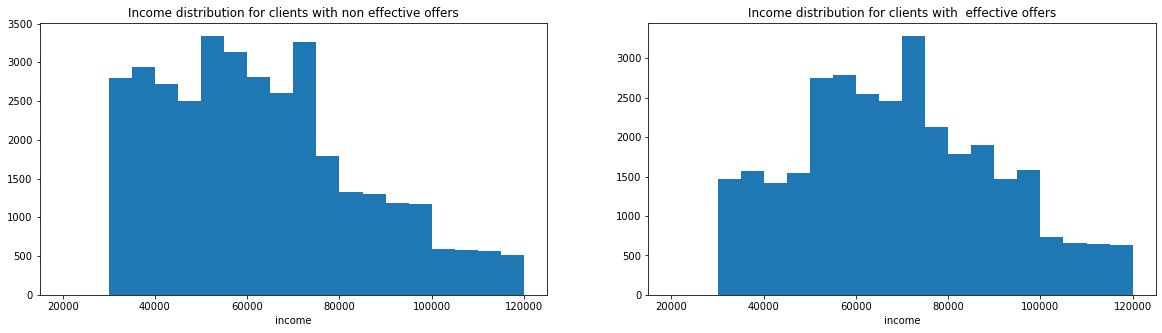

In [111]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
bins=np.arange(20000,df_visuals.income.max()+5000,5000);
plt.hist(data=df_visuals[df_visuals.effective==0],x='income',bins=bins);
plt.xlabel('income');
plt.title('Income distribution for clients with non effective offers');

plt.subplot(1,2,2)
plt.hist(data=df_visuals[df_visuals.effective==1],x='income',bins=bins);
plt.xlabel('income');
plt.title('Income distribution for clients with  effective offers');

#### as the income is lower the clients are less likely to be effective with offers

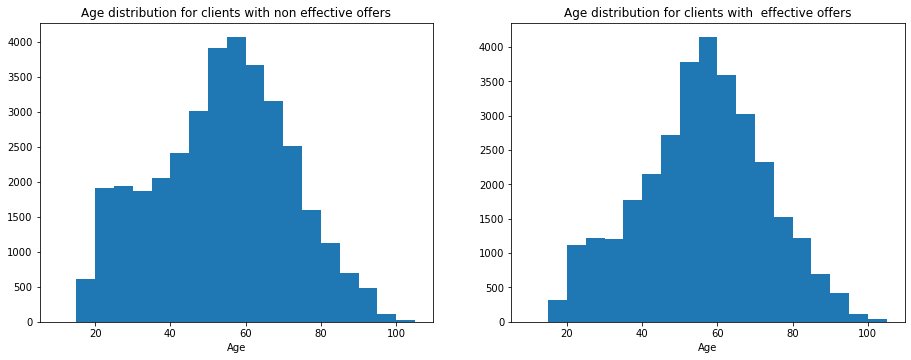

In [175]:
fig = plt.gcf()
fig.set_size_inches(15.5, 5.5)
plt.subplot(1,2,1)
bins=np.arange(10,df.age.max()+5,5);
plt.hist(data=df_visuals[df_visuals.effective==0],x='age',bins=bins);
plt.xlabel('Age');
plt.title('Age distribution for clients with non effective offers');

plt.subplot(1,2,2)
plt.hist(data=df_visuals[df_visuals.effective==1],x='age',bins=bins);
plt.xlabel('Age');
plt.title('Age distribution for clients with  effective offers');

#### Age distribution for clients who don't respond is skewed to the right while that for the ones who repond is more normally distributed about the mean

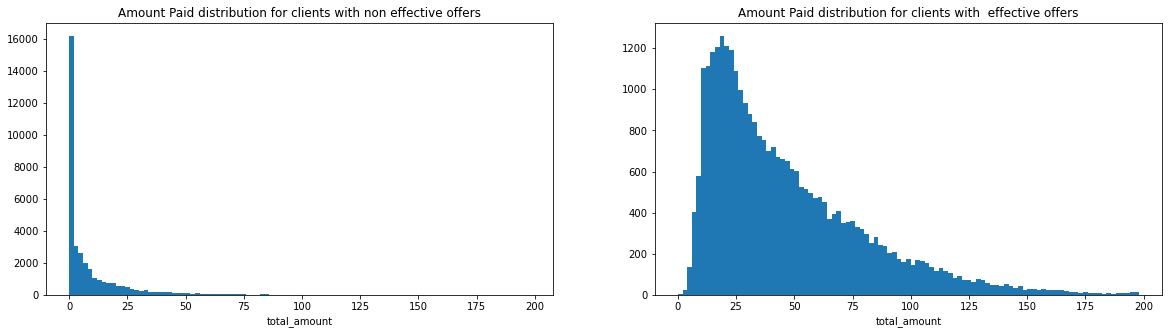

In [113]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
#bins=np.arange(0,df_visuals.total_amount.max()+5,5);
bins=np.arange(0,200,2);
plt.hist(data=df_visuals[df_visuals.effective==0],x='total_amount',bins=bins);
plt.xlabel('total_amount');
plt.title('Amount Paid distribution for clients with non effective offers');

plt.subplot(1,2,2)
plt.hist(data=df_visuals[df_visuals.effective==1],x='total_amount',bins=bins);
plt.xlabel('total_amount');
plt.title('Amount Paid distribution for clients with  effective offers');

#### Effective offers tends to have greater amounts paid

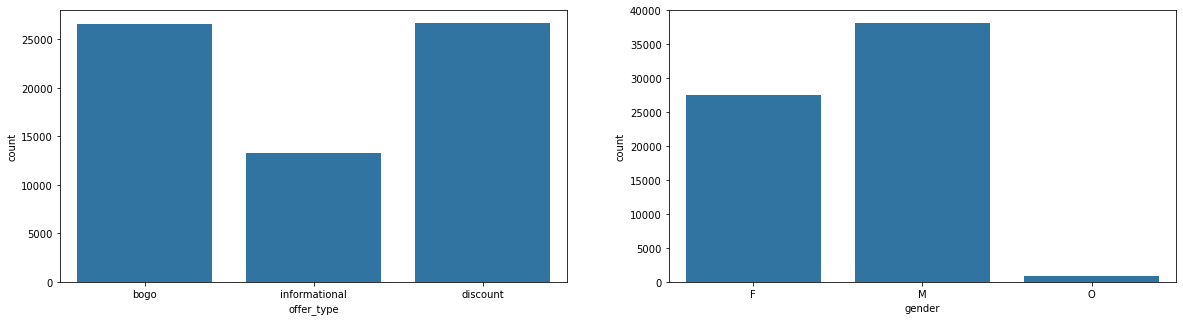

In [120]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
base_color = sb.color_palette()[0]
sb.countplot(data = df_visuals, x = 'offer_type', color = base_color);

plt.subplot(1,2,2)
sb.countplot(data = df_visuals, x = 'gender', color = base_color);

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


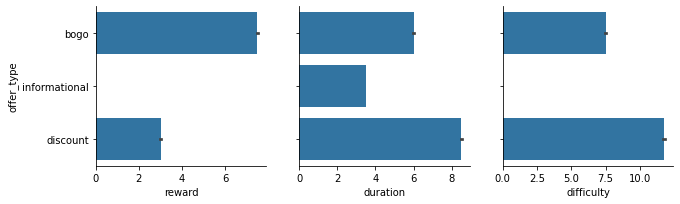

In [121]:
def bargrid(x, y, **kwargs):
    base_color = sb.color_palette()[0]
    sb.barplot(x, y, color = base_color)
g = sb.PairGrid(data=df_visuals, x_vars = ['reward','duration','difficulty'], 
            y_vars = ['offer_type'],size = 3, aspect = 1,dropna=True)
g.map(bargrid);

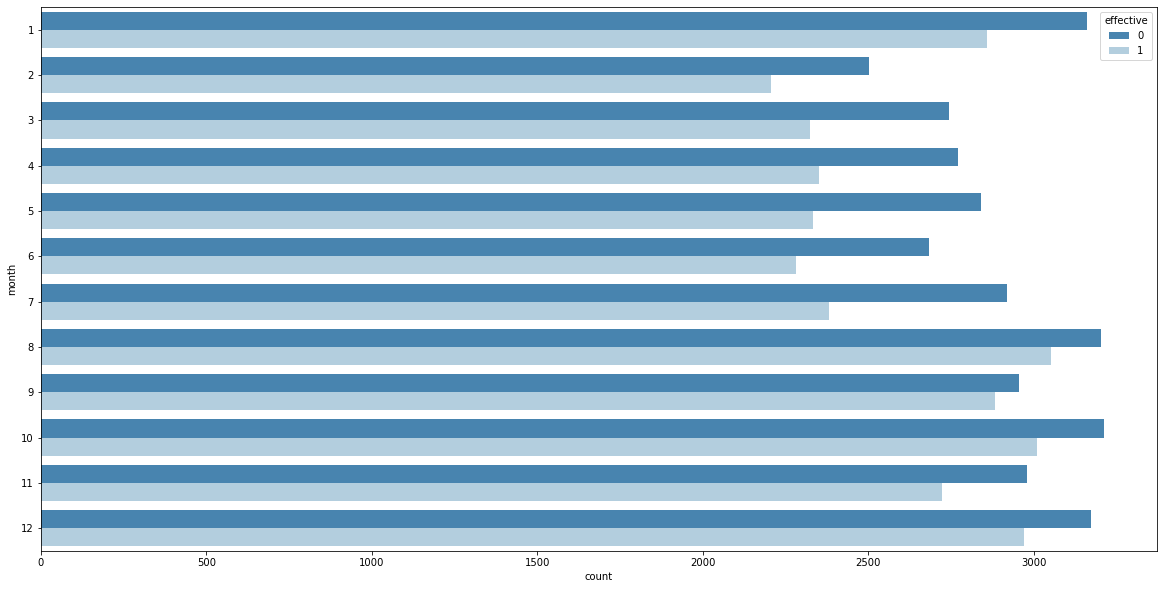

In [122]:
plt.figure(figsize=[20,10])
sb.countplot(data = df_visuals, y = 'month', hue = 'effective',palette ='Blues_r');

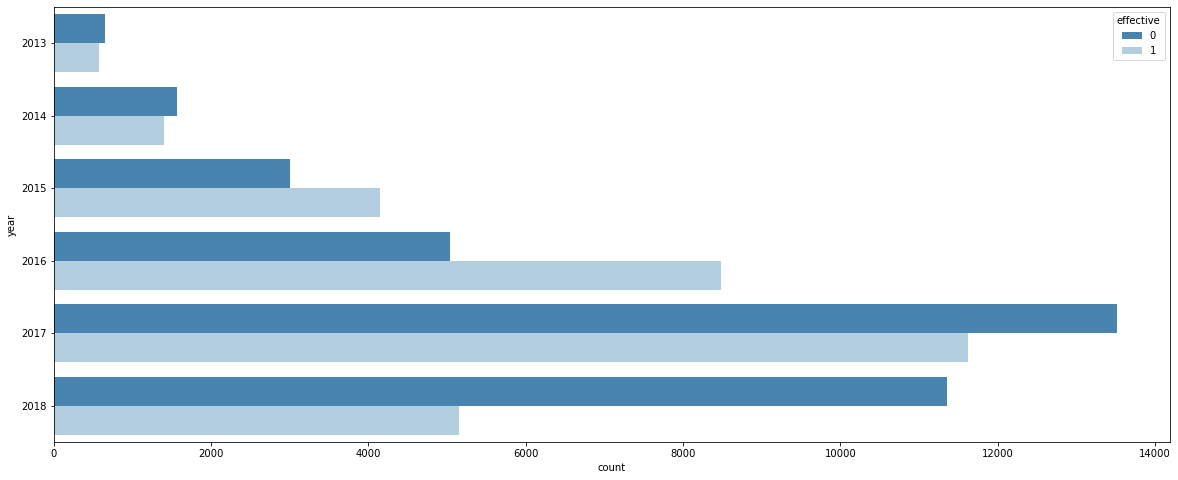

In [123]:
plt.figure(figsize=[20,8])
sb.countplot(data = df_visuals, y = 'year', hue = 'effective',palette ='Blues_r');

#### Most effective offers are the ones sent to clients who became members in 2017

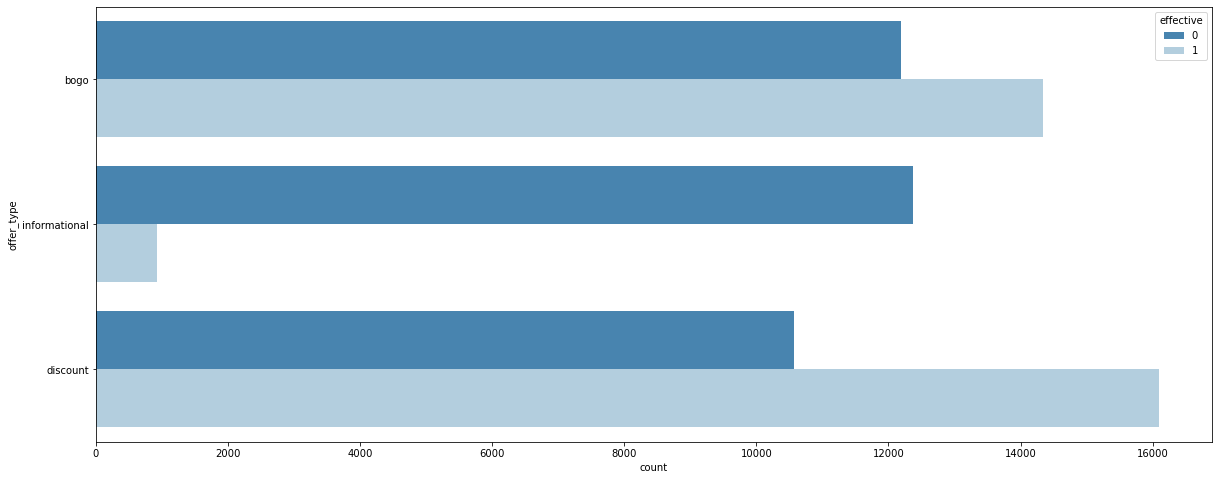

In [124]:
plt.figure(figsize=[20,8])
sb.countplot(data = df_visuals, y = 'offer_type', hue = 'effective',palette ='Blues_r');

#### Discount offers have greater possibility of being completed rather than other offers sent to the client

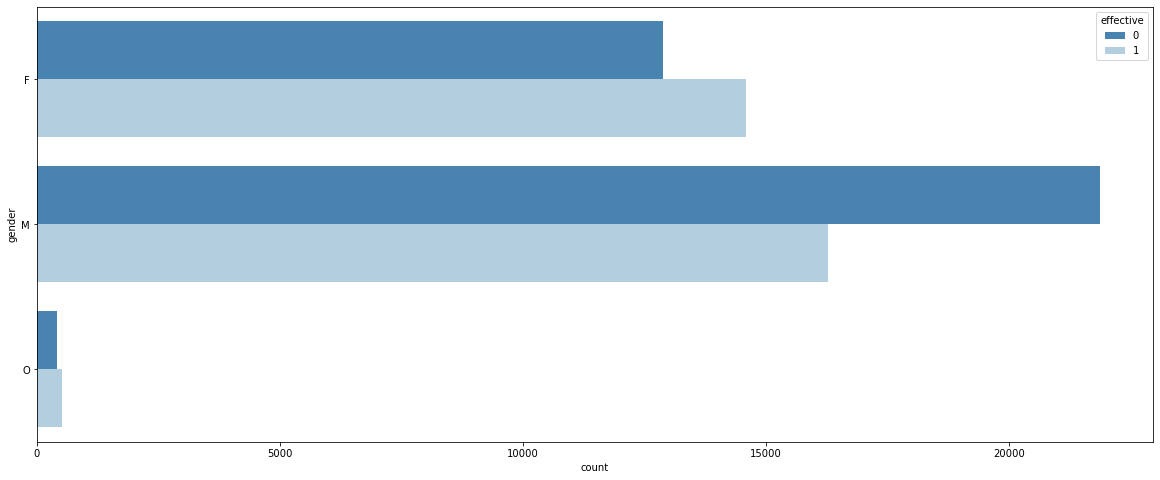

In [125]:
plt.figure(figsize=[20,8])
sb.countplot(data = df_visuals, y = 'gender', hue = 'effective',palette ='Blues_r');

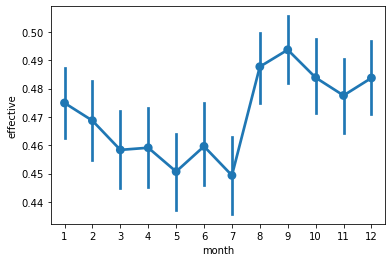

In [126]:
sb.pointplot(data=df_visuals,x='month', y='effective', color = base_color,linestyles='-');

## Extracting Features

In [135]:
df_final3=df_final2[['time','total_amount','reward','difficulty','duration','month','year',
                   'bogo','informational','age','income','gender_F','gender_M','effective']]

df_final3.head()

,time,total_amount,reward,difficulty,duration,month,year,bogo,informational,age,income,gender_F,gender_M,effective
0,0,37.67,5,5,7,5,2017,1,0,75,100000.0,1,0,1
1,168,49.39,0,0,3,5,2017,0,1,75,100000.0,1,0,0
2,408,48.28,10,10,7,5,2017,1,0,75,100000.0,1,0,1
3,504,48.28,5,5,5,5,2017,1,0,75,100000.0,1,0,1
4,0,0.00,2,10,7,4,2018,0,0,68,70000.0,0,1,0


In [136]:
df_final3['duration']=df_final3['duration']*24

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [137]:
display(df_final3.head())

,time,total_amount,reward,difficulty,duration,month,year,bogo,informational,age,income,gender_F,gender_M,effective
0,0,37.67,5,5,168,5,2017,1,0,75,100000.0,1,0,1
1,168,49.39,0,0,72,5,2017,0,1,75,100000.0,1,0,0
2,408,48.28,10,10,168,5,2017,1,0,75,100000.0,1,0,1
3,504,48.28,5,5,120,5,2017,1,0,75,100000.0,1,0,1
4,0,0.00,2,10,168,4,2018,0,0,68,70000.0,0,1,0


In [138]:
corr_matrix = df_final3.corr().abs().round(2)
corr_matrix

,time,total_amount,reward,difficulty,duration,month,year,bogo,informational,age,income,gender_F,gender_M,effective
time,1.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05
total_amount,0.02,1.00,0.04,0.12,0.16,0.02,0.11,0.01,0.13,0.06,0.18,0.09,0.09,0.38
reward,0.00,0.04,1.00,0.47,0.16,0.00,0.00,0.79,0.62,0.00,0.00,0.00,0.00,0.19
difficulty,0.00,0.12,0.47,1.00,0.81,0.01,0.00,0.03,0.70,0.00,0.00,0.00,0.00,0.23
duration,0.00,0.16,0.16,0.81,1.00,0.00,0.00,0.18,0.68,0.00,0.00,0.00,0.00,0.29
month,0.00,0.02,0.00,0.01,0.00,1.00,0.29,0.00,0.00,0.01,0.02,0.03,0.03,0.02
year,0.00,0.11,0.00,0.00,0.00,0.29,1.00,0.00,0.00,0.01,0.03,0.01,0.01,0.16
bogo,0.00,0.01,0.79,0.03,0.18,0.00,0.00,1.00,0.41,0.00,0.00,0.00,0.00,0.11
informational,0.00,0.13,0.62,0.70,0.68,0.00,0.00,0.41,1.00,0.01,0.00,0.00,0.00,0.40
age,0.00,0.06,0.00,0.00,0.00,0.01,0.01,0.00,0.01,1.00,0.31,0.15,0.15,0.07


In [139]:
df_final3.effective.value_counts()

0    35136
1    31365
Name: effective, dtype: int64

In [144]:
from sklearn.model_selection import train_test_split

X = df_final3.iloc[:, :-1].values
y = df_final3.iloc[:, -1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.25)

In [145]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

## Training &Testing Model

#### BENCHMARK MODEL: Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression
classifierbm = LogisticRegression()
classifierbm.fit(X_train, y_train)

LogisticRegression()

In [147]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
y_pred = classifierbm.predict(X_test)
cmbm = confusion_matrix(y_test, y_pred)
print(cmbm)
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('F1_score: ',f1_score(y_test, y_pred))

[[8003  781]
 [1346 6496]]
Accuracy:  0.8720678455431252
F1_score:  0.8593160923341491


### Naive Bayes

In [148]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [149]:
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('F1_score: ',f1_score(y_test, y_pred))

[[4804 3980]
 [ 874 6968]]
Accuracy:  0.7080476362324071
F1_score:  0.7416711016498138


### Neural Network Using Keras

In [152]:
from keras.models import Sequential
from keras.layers import Dense

In [153]:
model = Sequential()
model.add(Dense(60, input_dim=13, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [154]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [155]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
780/780 [==============================] - 54s 4ms/step - loss: 0.4341 - accuracy: 0.7969
Epoch 2/100
780/780 [==============================] - 2s 3ms/step - loss: 0.2385 - accuracy: 0.9083
Epoch 3/100
780/780 [==============================] - 1s 2ms/step - loss: 0.2265 - accuracy: 0.9095
Epoch 4/100
780/780 [==============================] - 2s 2ms/step - loss: 0.2140 - accuracy: 0.9131
Epoch 5/100
780/780 [==============================] - 4s 5ms/step - loss: 0.2170 - accuracy: 0.9123
Epoch 6/100
780/780 [==============================] - 2s 3ms/step - loss: 0.2123 - accuracy: 0.9123
Epoch 7/100
780/780 [==============================] - 2s 2ms/step - loss: 0.2130 - accuracy: 0.9119
Epoch 8/100
780/780 [==============================] - 1s 1ms/step - loss: 0.2053 - accuracy: 0.9156
Epoch 9/100
780/780 [==============================] - 3s 4ms/step - loss: 0.2052 - accuracy: 0.9151
Epoch 10/100
780/780 [==============================] - 3s 4ms/step - loss: 0.2012 - accur

780/780 [==============================] - 1s 2ms/step - loss: 0.1801 - accuracy: 0.9249
Epoch 82/100
780/780 [==============================] - 3s 4ms/step - loss: 0.1837 - accuracy: 0.9233: 0s - los
Epoch 83/100
780/780 [==============================] - 2s 3ms/step - loss: 0.1802 - accuracy: 0.9240
Epoch 84/100
780/780 [==============================] - 2s 2ms/step - loss: 0.1822 - accuracy: 0.9218
Epoch 85/100
780/780 [==============================] - 1s 2ms/step - loss: 0.1783 - accuracy: 0.9255
Epoch 86/100
780/780 [==============================] - 1s 2ms/step - loss: 0.1783 - accuracy: 0.9240
Epoch 87/100
780/780 [==============================] - 1s 1ms/step - loss: 0.1794 - accuracy: 0.9263
Epoch 88/100
780/780 [==============================] - 1s 1ms/step - loss: 0.1795 - accuracy: 0.9243
Epoch 89/100
780/780 [==============================] - 1s 2ms/step - loss: 0.1797 - accuracy: 0.9239
Epoch 90/100
780/780 [==============================] - 1s 2ms/step - loss: 0.1793 - 

In [156]:
y_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('F1_score: ',f1_score(y_test, y_pred))

C:\Users\hp\Anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[7910  874]
 [ 655 7187]]
Accuracy:  0.9080356068807891
F1_score:  0.9038546186254166


### XGBoost

In [159]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [160]:
y_pred = xg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('F1_score: ',f1_score(y_test, y_pred))

[[7982  802]
 [ 593 7249]]
Accuracy:  0.9160952724648141
F1_score:  0.9122255080853205


### Support Vector Machine (svm)

In [163]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(X_train, y_train)

SVC()

In [164]:
y_pred = svc.predict(X_test)
cmsvc = confusion_matrix(y_test, y_pred)
print(cmsvc)
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('F1_score: ',f1_score(y_test, y_pred))

[[8084  700]
 [ 933 6909]]
Accuracy:  0.9017803440394563
F1_score:  0.8943110478286195


### Random Forest Classifier

In [162]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
RF_classifier= rfc.fit(X_train, y_train)

In [165]:
y_pred = RF_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('F1_score: ',f1_score(y_test, y_pred))

[[7946  838]
 [ 576 7266]]
Accuracy:  0.9149524840611091
F1_score:  0.9113257243195786


### Hyperparameter Tuning

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
xgtune = XGBClassifier()

max_depth=[5,8]
max_depth.append(None)
scorer = make_scorer(fbeta_score, beta = 0.5)
parameters={'max_depth': [3, 12],
            'eta'      : [0.05, 0.5],
            'min_child_weight': [2, 8],
            'subsample': [0.5, 0.9],
            'gamma': [0, 10],                    
           }
# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(xgtune, parameters, scoring=scorer, cv=3, verbose=2)
# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)
# Get the estimator
best_xg = grid_fit.best_estimator_
# Make predictions using the unoptimized and model
predictions = (xgtune.fit(X_train, y_train)).predict(X_test)
best_predictions = best_xg.predict(X_test)

cm_xgtune = confusion_matrix(y_test, best_predictions)
print(cm_xgtune)
print('Accuracy: ',accuracy_score(y_test, best_predictions))
print('F1_score: ',f1_score(y_test, best_predictions))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[16:11:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] END eta=0.05, gamma=0, max_depth=3, min_child_weight=2, subsample=0.5; total time=   3.2s
[16:11:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=3, min_child_weight=2, subsample=0.5; total time=   1.8s
[16:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=3, min_child_weight=2, subsample=0.5; total time=   1.5s
[16:11:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=3, min_child_weight=2, subsample=0.9; total time=   1.2s
[16:11:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=3, min_child_weight=2, subsample=0.9; total time=   1.1s
[16:11:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=3, min_child_weight=2, subsample=0.9; total time=   1.0s
[16:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=3, min_child_weight=8, subsample=0.5; total time=   1.2s
[16:11:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=3, min_child_weight=8, subsample=0.5; total time=   1.2s
[16:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=3, min_child_weight=8, subsample=0.5; total time=   1.4s
[16:11:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=3, min_child_weight=8, subsample=0.9; total time=   1.4s
[16:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=3, min_child_weight=8, subsample=0.9; total time=   1.1s
[16:11:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=3, min_child_weight=8, subsample=0.9; total time=   1.0s
[16:11:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=12, min_child_weight=2, subsample=0.5; total time=   4.1s
[16:11:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=12, min_child_weight=2, subsample=0.5; total time=   3.8s
[16:11:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=12, min_child_weight=2, subsample=0.5; total time=   4.6s
[16:11:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=12, min_child_weight=2, subsample=0.9; total time=   4.3s
[16:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=12, min_child_weight=2, subsample=0.9; total time=   5.4s
[16:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=12, min_child_weight=2, subsample=0.9; total time=   5.1s
[16:11:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=12, min_child_weight=8, subsample=0.5; total time=   3.8s
[16:11:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=12, min_child_weight=8, subsample=0.5; total time=   4.2s
[16:11:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=12, min_child_weight=8, subsample=0.5; total time=   3.7s
[16:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=12, min_child_weight=8, subsample=0.9; total time=   5.4s
[16:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=12, min_child_weight=8, subsample=0.9; total time=   4.9s
[16:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=0, max_depth=12, min_child_weight=8, subsample=0.9; total time=   5.1s
[16:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=3, min_child_weight=2, subsample=0.5; total time=   1.2s
[16:12:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=3, min_child_weight=2, subsample=0.5; total time=   1.2s
[16:12:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=3, min_child_weight=2, subsample=0.5; total time=   1.1s
[16:12:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=3, min_child_weight=2, subsample=0.9; total time=   1.3s
[16:12:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=3, min_child_weight=2, subsample=0.9; total time=   1.5s
[16:12:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=3, min_child_weight=2, subsample=0.9; total time=   1.3s
[16:12:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=3, min_child_weight=8, subsample=0.5; total time=   1.6s
[16:12:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=3, min_child_weight=8, subsample=0.5; total time=   1.1s
[16:12:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=3, min_child_weight=8, subsample=0.5; total time=   1.2s
[16:12:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=3, min_child_weight=8, subsample=0.9; total time=   1.7s
[16:12:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=3, min_child_weight=8, subsample=0.9; total time=   1.5s
[16:12:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=3, min_child_weight=8, subsample=0.9; total time=   1.3s
[16:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=12, min_child_weight=2, subsample=0.5; total time=   4.3s
[16:12:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=12, min_child_weight=2, subsample=0.5; total time=   5.4s
[16:12:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] END eta=0.05, gamma=10, max_depth=12, min_child_weight=2, subsample=0.5; total time=   7.8s
[16:12:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=12, min_child_weight=2, subsample=0.9; total time=   4.6s
[16:12:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=12, min_child_weight=2, subsample=0.9; total time=   5.7s


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:13:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END eta=0.05, gamma=10, max_depth=12, min_child_weight=2, subsample=0.9; total time=   8.4s


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:13:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END eta=0.05, gamma=10, max_depth=12, min_child_weight=8, subsample=0.5; total time=   7.6s
[16:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=12, min_child_weight=8, subsample=0.5; total time=   3.7s
[16:13:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=12, min_child_weight=8, subsample=0.5; total time=   4.5s
[16:13:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=12, min_child_weight=8, subsample=0.9; total time=   3.7s
[16:13:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=12, min_child_weight=8, subsample=0.9; total time=   5.2s
[16:13:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.05, gamma=10, max_depth=12, min_child_weight=8, subsample=0.9; total time=   4.1s
[16:13:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=3, min_child_weight=2, subsample=0.5; total time=   1.6s
[16:13:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=3, min_child_weight=2, subsample=0.5; total time=   1.6s
[16:13:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=3, min_child_weight=2, subsample=0.5; total time=   1.5s
[16:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=3, min_child_weight=2, subsample=0.9; total time=   1.6s
[16:13:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=3, min_child_weight=2, subsample=0.9; total time=   1.4s
[16:13:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=3, min_child_weight=2, subsample=0.9; total time=   1.5s
[16:13:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=3, min_child_weight=8, subsample=0.5; total time=   1.7s
[16:13:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=3, min_child_weight=8, subsample=0.5; total time=   1.6s
[16:13:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=3, min_child_weight=8, subsample=0.5; total time=   1.2s
[16:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=3, min_child_weight=8, subsample=0.9; total time=   1.1s
[16:13:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=3, min_child_weight=8, subsample=0.9; total time=   1.0s
[16:13:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=3, min_child_weight=8, subsample=0.9; total time=   1.2s
[16:13:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=12, min_child_weight=2, subsample=0.5; total time=   4.7s
[16:14:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=12, min_child_weight=2, subsample=0.5; total time=   5.1s
[16:14:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=12, min_child_weight=2, subsample=0.5; total time=   4.7s
[16:14:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=12, min_child_weight=2, subsample=0.9; total time=   5.5s
[16:14:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=12, min_child_weight=2, subsample=0.9; total time=   5.1s
[16:14:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=12, min_child_weight=2, subsample=0.9; total time=   5.9s
[16:14:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=12, min_child_weight=8, subsample=0.5; total time=   4.9s
[16:14:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=12, min_child_weight=8, subsample=0.5; total time=   5.2s
[16:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=12, min_child_weight=8, subsample=0.5; total time=   4.8s
[16:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=12, min_child_weight=8, subsample=0.9; total time=   3.8s
[16:14:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=12, min_child_weight=8, subsample=0.9; total time=   5.2s
[16:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=0, max_depth=12, min_child_weight=8, subsample=0.9; total time=   4.3s
[16:14:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=3, min_child_weight=2, subsample=0.5; total time=   1.6s
[16:14:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=3, min_child_weight=2, subsample=0.5; total time=   1.2s
[16:14:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=3, min_child_weight=2, subsample=0.5; total time=   1.1s
[16:15:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=3, min_child_weight=2, subsample=0.9; total time=   1.0s
[16:15:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=3, min_child_weight=2, subsample=0.9; total time=   1.0s
[16:15:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=3, min_child_weight=2, subsample=0.9; total time=   1.6s
[16:15:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=3, min_child_weight=8, subsample=0.5; total time=   1.3s
[16:15:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=3, min_child_weight=8, subsample=0.5; total time=   1.1s
[16:15:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=3, min_child_weight=8, subsample=0.5; total time=   1.1s
[16:15:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=3, min_child_weight=8, subsample=0.9; total time=   1.1s
[16:15:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=3, min_child_weight=8, subsample=0.9; total time=   1.3s
[16:15:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=3, min_child_weight=8, subsample=0.9; total time=   1.5s
[16:15:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=12, min_child_weight=2, subsample=0.5; total time=   4.2s
[16:15:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=12, min_child_weight=2, subsample=0.5; total time=   5.9s
[16:15:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=12, min_child_weight=2, subsample=0.5; total time=   5.2s
[16:15:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=12, min_child_weight=2, subsample=0.9; total time=   5.6s
[16:15:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=12, min_child_weight=2, subsample=0.9; total time=   5.0s
[16:15:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=12, min_child_weight=2, subsample=0.9; total time=   5.8s
[16:15:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=12, min_child_weight=8, subsample=0.5; total time=   3.6s
[16:15:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=12, min_child_weight=8, subsample=0.5; total time=   5.1s
[16:15:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=12, min_child_weight=8, subsample=0.5; total time=   3.8s
[16:15:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=12, min_child_weight=8, subsample=0.9; total time=   4.6s
[16:16:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=12, min_child_weight=8, subsample=0.9; total time=   4.9s
[16:16:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END eta=0.5, gamma=10, max_depth=12, min_child_weight=8, subsample=0.9; total time=   4.7s
[16:16:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:16:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[7954  830]
 [ 582 7260]]
Accuracy:  0.9150727775772886
F1_score:  0.9113733366808938


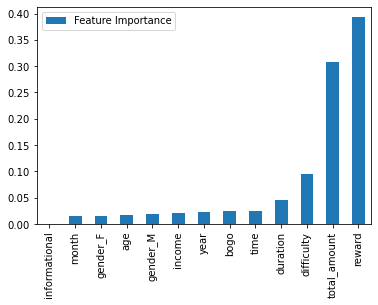

In [177]:
feature_column=df_final3[['time','total_amount','reward','difficulty','duration','month','year',
                   'bogo','informational','age','income','gender_F','gender_M']].columns
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(feature_column, best_xg.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Feature Importance'})
importances.sort_values(by='Feature Importance').plot(kind='bar', rot=90);

##### After tuning hyperparameters, we can see that total_amount and reward are the most important features that help perform better predictions

##### Tuned XGBoost and Random forest classifier gave the highest results with least f1_score, in my opinion, tuned XGBoost is somehow complicated